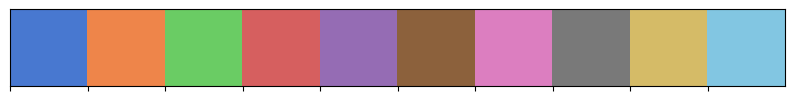

In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
current_palette = sns.color_palette('muted')
sns.palplot(current_palette)
plt.show()

In [2]:
import pandas as pd
df = pd.read_excel('./results.xlsx',header=0)


In [3]:
import seaborn as sns

colors_palette = sns.color_palette('muted')

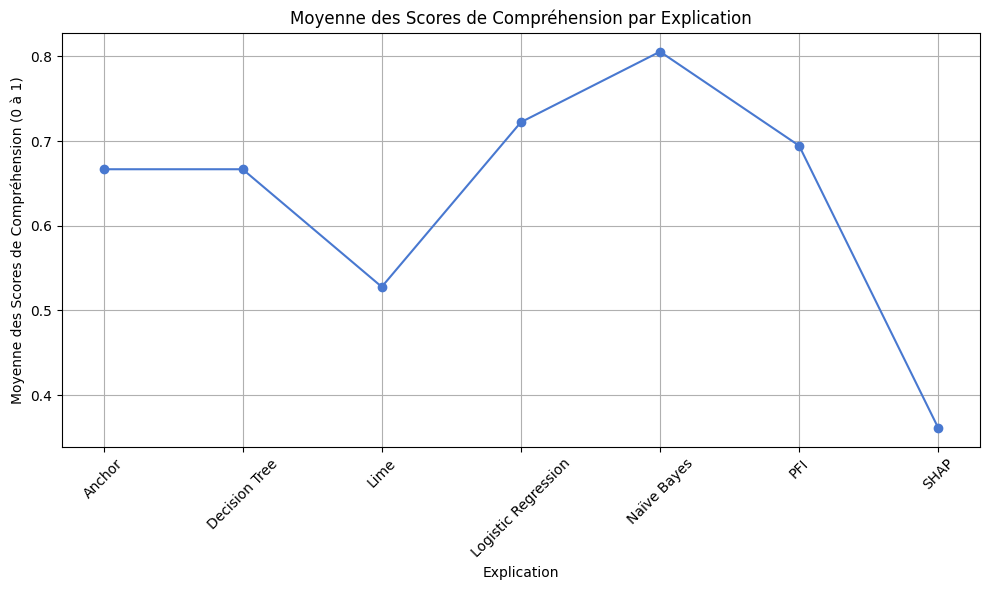

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

comprehension_columns = [
    'Explication 1 : Comprenez vous les explications fournies ?',
    'Explication 2 : Comprenez vous les explications fournies ?',
    'Explication 3 : Comprenez vous les explications fournies ?',
    'Explication 4 : Comprenez vous les explications fournies ?',
    'Explication 5 : Comprenez vous les explications fournies ?',
    'Explication 6 : Comprenez vous les explications fournies ?',
    'Explication 7 : Comprenez vous les explications fournies ?'
]

new_labels = {
    'Explication 1 : Comprenez vous les explications fournies ?': 'Lime',
    'Explication 2 : Comprenez vous les explications fournies ?': 'Anchor',
    'Explication 3 : Comprenez vous les explications fournies ?': 'SHAP',
    'Explication 4 : Comprenez vous les explications fournies ?': 'Decision Tree',
    'Explication 5 : Comprenez vous les explications fournies ?': 'Naïve Bayes',
    'Explication 6 : Comprenez vous les explications fournies ?': 'Logistic Regression',
    'Explication 7 : Comprenez vous les explications fournies ?': 'PFI'
}

df_melted_comprehension = pd.melt(
    df,
    value_vars=comprehension_columns,
    var_name='Explication',
    value_name='Réponse'
).replace({'Explication': new_labels})

response_mapping = {
    'Je ne comprends pas du tout les explications.': 0,
    'Je ne suis pas certain de comprendre.': 0.5,
    'Oui, tout me semble clair.': 1
}

df_melted_comprehension['Score'] = df_melted_comprehension['Réponse'].map(response_mapping)

mean_scores_comprehension = df_melted_comprehension.groupby('Explication')['Score'].mean()

plt.figure(figsize=(10, 6))

plt.plot(mean_scores_comprehension.index, mean_scores_comprehension.values, marker='o', color=colors_palette[0])

plt.title('Moyenne des Scores de Compréhension par Explication')
plt.xlabel('Explication')
plt.ylabel('Moyenne des Scores de Compréhension (0 à 1)')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()


<ipython-input-5-946d51218abb>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced.rename(columns=new_labels, inplace=True)
<ipython-input-5-946d51218abb>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[col] = df_reduced[col].map(response_mapping)
<ipython-input-5-946d51218abb>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

Lime                                                                                               float64
Anchor                                                                                             float64
SHAP                                                                                               float64
Decision Tree                                                                                      float64
Naïve Bayes                                                                                        float64
Logistic Regression                                                                                float64
PFI                                                                                                float64
Travaillez vous, effectuez vous ou Avez-vous effectué des études dans le domaine informatique ?     object
dtype: object
['Étranger' 'Professionnel' 'Étudiant']
Lime                                                                                      

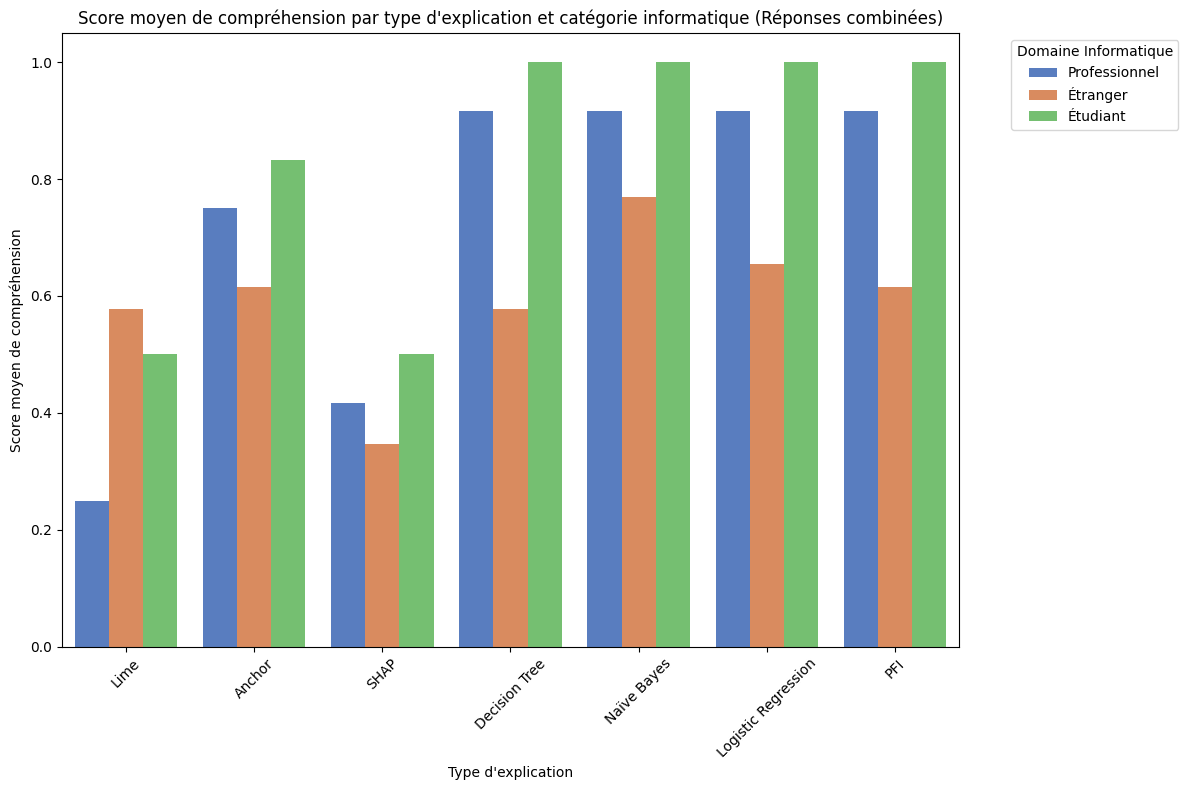

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


comprehension_columns = [
    'Explication 1 : Comprenez vous les explications fournies ?',
    'Explication 2 : Comprenez vous les explications fournies ?',
    'Explication 3 : Comprenez vous les explications fournies ?',
    'Explication 4 : Comprenez vous les explications fournies ?',
    'Explication 5 : Comprenez vous les explications fournies ?',
    'Explication 6 : Comprenez vous les explications fournies ?',
    'Explication 7 : Comprenez vous les explications fournies ?'
]

informatique_column = 'Travaillez vous, effectuez vous ou Avez-vous effectué des études dans le domaine informatique ?'

df_reduced = df[comprehension_columns + [informatique_column]]

new_labels = {
    'Explication 1 : Comprenez vous les explications fournies ?': 'Lime',
    'Explication 2 : Comprenez vous les explications fournies ?': 'Anchor',
    'Explication 3 : Comprenez vous les explications fournies ?': 'SHAP',
    'Explication 4 : Comprenez vous les explications fournies ?': 'Decision Tree',
    'Explication 5 : Comprenez vous les explications fournies ?': 'Naïve Bayes',
    'Explication 6 : Comprenez vous les explications fournies ?': 'Logistic Regression',
    'Explication 7 : Comprenez vous les explications fournies ?': 'PFI'
}

df_reduced.rename(columns=new_labels, inplace=True)

response_mapping = {
    'Je ne comprends pas du tout les explications.': 0,
    'Je ne suis pas certain de comprendre.': 0.5,
    'Oui, tout me semble clair.': 1
}

for col in new_labels.values():
    df_reduced[col] = df_reduced[col].map(response_mapping)

print(df_reduced.dtypes)

informatique_mapping_corrected = {
    "Non, j'y suis totalement étranger.": 'Étranger',
    "Oui, je suis étudiant dans ce domaine.": 'Étudiant',
    "Oui, je travaille dans ce domaine.": 'Professionnel',
    "Oui, je travaille dans ce domaine., Oui, je suis étudiant dans ce domaine.": 'Professionnel'
}

df_reduced['Informatique'] = df_reduced[informatique_column].map(informatique_mapping_corrected)

print(df_reduced['Informatique'].unique())

df_combined = df_reduced[df_reduced[informatique_column] == "Oui, je travaille dans ce domaine., Oui, je suis étudiant dans ce domaine."].copy()

df_combined_prof = df_combined.copy()
df_combined_prof['Informatique'] = 'Professionnel'

df_combined_etud = df_combined.copy()
df_combined_etud['Informatique'] = 'Étudiant'

df_expanded = pd.concat([df_reduced, df_combined_prof, df_combined_etud], ignore_index=True)

print(df_expanded.dtypes)

mean_scores_expanded = df_expanded.groupby(['Informatique']).mean(numeric_only=True).reset_index()
df_melted_expanded = pd.melt(mean_scores_expanded, id_vars=['Informatique'], value_vars=new_labels.values(), var_name='Explication', value_name='Score')

plt.figure(figsize=(12, 8))
sns.barplot(data=df_melted_expanded, x='Explication', y='Score', hue='Informatique', palette='muted')

plt.title('Score moyen de compréhension par type d\'explication et catégorie informatique (Réponses combinées)')
plt.xlabel('Type d\'explication')
plt.ylabel('Score moyen de compréhension')

plt.xticks(rotation=45)

plt.legend(title='Domaine Informatique', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


0               Pas d'avis
1     Relativement inquiet
2              Pas inquiet
3     Relativement inquiet
4              Pas inquiet
5                Favorable
6              Pas inquiet
7     Relativement inquiet
8              Pas inquiet
9              Pas inquiet
10              Pas d'avis
11             Pas inquiet
12             Pas inquiet
13    Relativement inquiet
14    Relativement inquiet
15              Pas d'avis
16             Pas inquiet
17    Relativement inquiet
Name: Inquiétude, dtype: object


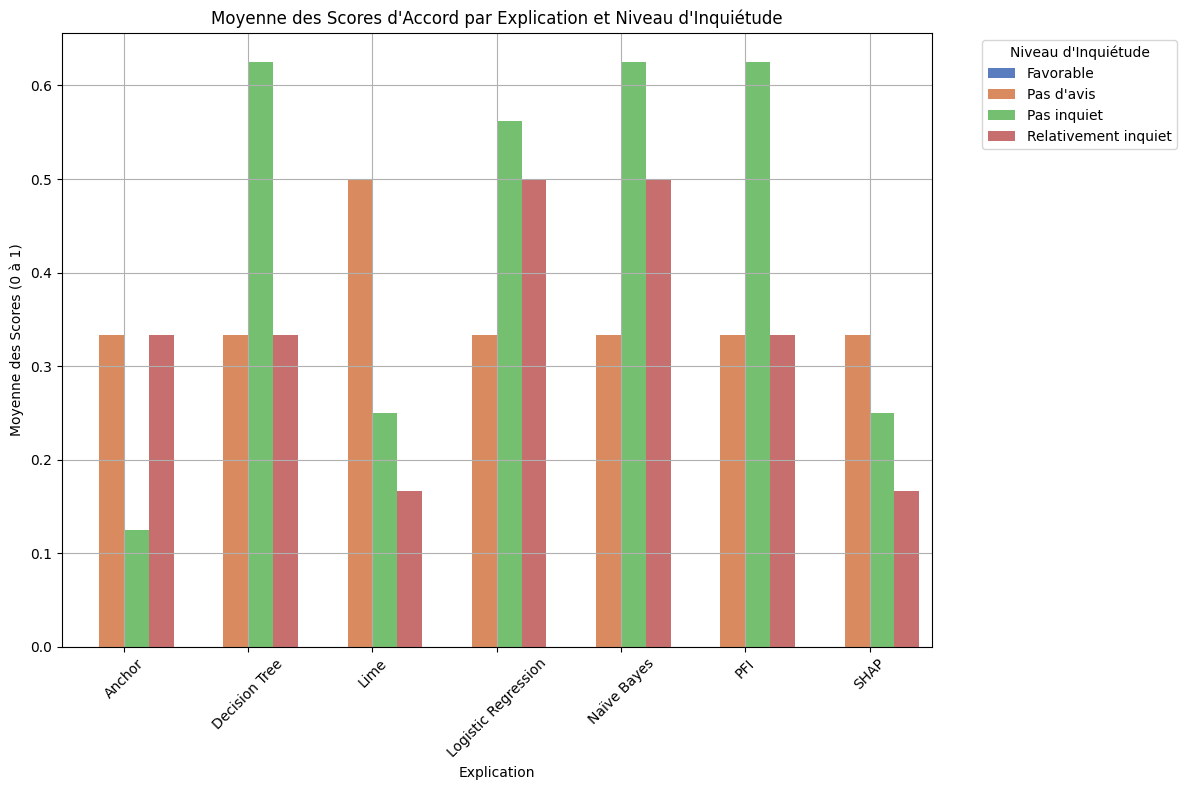

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


inquiétude_column = 'Êtes-vous inquiet que de telle technique puisse être employées dans différents domaines (éducation, juridique, médical …) ?'
agreement_columns = [
    'Explication 1 : Seriez vous à l\'aise avec la décision qui concerne Océane mais aussi celle qui concerne Pierre ?',
    'Explication 2 : Seriez vous à l\'aise avec la décision qui concerne Océane mais aussi celle qui concerne Pierre ?',
    'Explication 3 : Seriez vous à l\'aise avec la décision qui concerne Océane mais aussi celle qui concerne Pierre ?',
    'Explication 4 : Seriez vous à l\'aise si un étudiant était catégorisé E+P+ à l\'aide des explications fournies ? E-P- ?',
    'Explication 5 : Seriez vous à l\'aise si un étudiant était catégorisé E+P+ à l\'aide des explications fournies ? E-P- ?',
    'Explication 6 : Seriez vous à l\'aise si un étudiant était catégorisé E+P+ à l\'aide des explications fournies ? E-P- ?',
    'Explication 7 : Seriez vous à l\'aise si un étudiant était catégorisé E+P+ à l\'aide des explications fournies ? E-P- ?',
]

new_labels = {
    'Explication 1 : Seriez vous à l\'aise avec la décision qui concerne Océane mais aussi celle qui concerne Pierre ?': 'Lime',
    'Explication 2 : Seriez vous à l\'aise avec la décision qui concerne Océane mais aussi celle qui concerne Pierre ?': 'Anchor',
    'Explication 3 : Seriez vous à l\'aise avec la décision qui concerne Océane mais aussi celle qui concerne Pierre ?': 'SHAP',
    'Explication 4 : Seriez vous à l\'aise si un étudiant était catégorisé E+P+ à l\'aide des explications fournies ? E-P- ?': 'Decision Tree',
    'Explication 5 : Seriez vous à l\'aise si un étudiant était catégorisé E+P+ à l\'aide des explications fournies ? E-P- ?': 'Naïve Bayes',
    'Explication 6 : Seriez vous à l\'aise si un étudiant était catégorisé E+P+ à l\'aide des explications fournies ? E-P- ?': 'Logistic Regression',
    'Explication 7 : Seriez vous à l\'aise si un étudiant était catégorisé E+P+ à l\'aide des explications fournies ? E-P- ?': 'PFI'
}

agreement_mapping = {
    'Je ne serais pas à l\'aise dans les deux situations.': 0,
    'Je serais à l\'aise pour les deux décisions.': 1,
    'Je serais à l\'aise que dans le cas E+P+.': 0.5,
    'Oui je serais à l\'aise dans les deux cas.': 1,
    'Je ne suis à l\'aise que pour la décision d\'Océane (E-P-)': 0.5,
    'Je ne suis à l\'aise que pour la décision de Pierre (E-P-)': 0.5,
    'Que ce soit pour Océane ou pour Pierre je ne suis pas à l\'aise avec la décision.': 0
}

inquiétude_mapping = {
    "Non, je suis même favorable.": 'Favorable',
    "Non, cela ne m’inquiète pas.": 'Pas inquiet',
    "Je n’ai pas d’avis sur la question.": 'Pas d\'avis',
    "Je suis relativement inquiet.": 'Relativement inquiet',
    "Je m’oppose fermement à cette idée.": 'Opposition ferme'
}

df['Inquiétude'] = df[inquiétude_column].map(inquiétude_mapping)
print(df['Inquiétude'])

df_melted_agreement = pd.melt(
    df,
    id_vars=['Inquiétude'],
    value_vars=agreement_columns,
    var_name='Explication',
    value_name='Réponse'
)

df_melted_agreement['Explication'] = df_melted_agreement['Explication'].replace(new_labels)

df_melted_agreement['Score'] = df_melted_agreement['Réponse'].map(agreement_mapping)

mean_scores_agreement_inquiétude = df_melted_agreement.groupby(['Inquiétude', 'Explication'])['Score'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(data=mean_scores_agreement_inquiétude, x='Explication', y='Score', hue='Inquiétude', palette='muted')

plt.title('Moyenne des Scores d\'Accord par Explication et Niveau d\'Inquiétude')
plt.xlabel('Explication')
plt.ylabel('Moyenne des Scores (0 à 1)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Niveau d\'Inquiétude', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


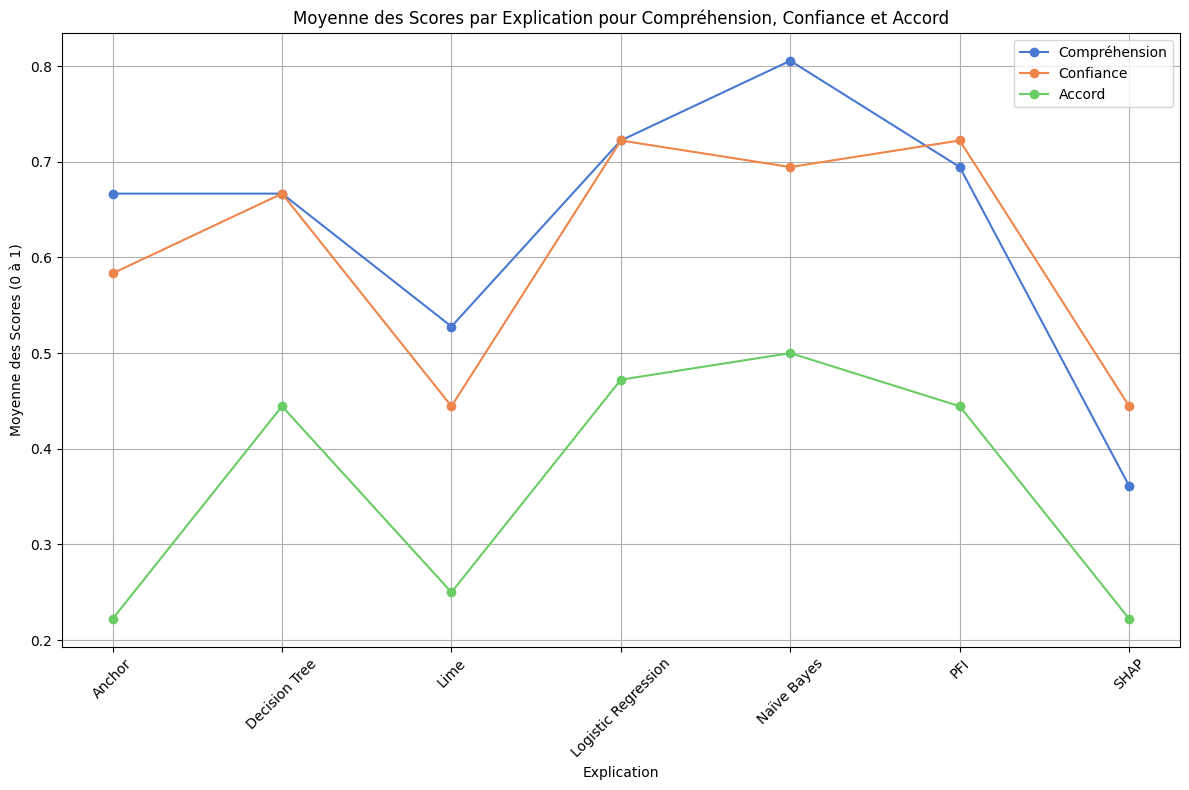

    Explication                                            Réponse  Score
0          Lime  Que ce soit pour Océane ou pour Pierre je ne s...    0.0
1          Lime        Je serais à l'aise pour les deux décisions.    1.0
2          Lime  Que ce soit pour Océane ou pour Pierre je ne s...    0.0
3          Lime  Que ce soit pour Océane ou pour Pierre je ne s...    0.0
4          Lime  Je ne suis à l'aise que pour la décision de Pi...    0.5
..          ...                                                ...    ...
121         PFI           Je serais à l'aise que dans le cas E+P+.    0.5
122         PFI  Je ne serais pas à l'aise dans les deux situat...    0.0
123         PFI  Je ne serais pas à l'aise dans les deux situat...    0.0
124         PFI          Oui je serais à l'aise dans les deux cas.    1.0
125         PFI  Je ne serais pas à l'aise dans les deux situat...    0.0

[126 rows x 3 columns]


In [7]:
  import matplotlib.pyplot as plt

  comprehension_columns = [
      'Explication 1 : Comprenez vous les explications fournies ?',
      'Explication 2 : Comprenez vous les explications fournies ?',
      'Explication 3 : Comprenez vous les explications fournies ?',
      'Explication 4 : Comprenez vous les explications fournies ?',
      'Explication 5 : Comprenez vous les explications fournies ?',
      'Explication 6 : Comprenez vous les explications fournies ?',
      'Explication 7 : Comprenez vous les explications fournies ?'
  ]
  confidence_columns = [
      'Explication 1 : Avez vous confiance dans les explication fournies ?',
      'Explication 2 : Avez vous confiance dans les explication fournies ?',
      'Explication 3 : Avez vous confiance dans les explications fournies ?',
      'Explication 4 : Avez vous confiance dans les explication fournis ?',
      'Explication 5 : Avez vous confiance dans les explications fournies ?',
      'Explication 6 : Avez vous confiance dans les explications fournies ?',
      'Explication 7 : Avez vous confiance dans les explications fournies ?'
  ]
  agreement_columns = [
      'Explication 1 : Seriez vous à l\'aise avec la décision qui concerne Océane mais aussi celle qui concerne Pierre ?',
      'Explication 2 : Seriez vous à l\'aise avec la décision qui concerne Océane mais aussi celle qui concerne Pierre ?',
      'Explication 3 : Seriez vous à l\'aise avec la décision qui concerne Océane mais aussi celle qui concerne Pierre ?',
      'Explication 4 : Seriez vous à l\'aise si un étudiant était catégorisé E+P+ à l\'aide des explications fournies ? E-P- ?',
      'Explication 5 : Seriez vous à l\'aise si un étudiant était catégorisé E+P+ à l\'aide des explications fournies ? E-P- ?',
      'Explication 6 : Seriez vous à l\'aise si un étudiant était catégorisé E+P+ à l\'aide des explications fournies ? E-P- ?',
      'Explication 7 : Seriez vous à l\'aise si un étudiant était catégorisé E+P+ à l\'aide des explications fournies ? E-P- ?',
  ]

  new_labels = {
      'Explication 1 : Comprenez vous les explications fournies ?': 'Lime',
      'Explication 2 : Comprenez vous les explications fournies ?': 'Anchor',
      'Explication 3 : Comprenez vous les explications fournies ?': 'SHAP',
      'Explication 4 : Comprenez vous les explications fournies ?': 'Decision Tree',
      'Explication 5 : Comprenez vous les explications fournies ?': 'Naïve Bayes',
      'Explication 6 : Comprenez vous les explications fournies ?': 'Logistic Regression',
      'Explication 7 : Comprenez vous les explications fournies ?': 'PFI',
      'Explication 1 : Avez vous confiance dans les explication fournies ?': 'Lime',
      'Explication 2 : Avez vous confiance dans les explication fournies ?': 'Anchor',
      'Explication 3 : Avez vous confiance dans les explications fournies ?': 'SHAP',
      'Explication 4 : Avez vous confiance dans les explication fournis ?': 'Decision Tree',
      'Explication 5 : Avez vous confiance dans les explications fournies ?': 'Naïve Bayes',
      'Explication 6 : Avez vous confiance dans les explications fournies ?': 'Logistic Regression',
      'Explication 7 : Avez vous confiance dans les explications fournies ?': 'PFI',
      'Explication 1 : Seriez vous à l\'aise avec la décision qui concerne Océane mais aussi celle qui concerne Pierre ?': 'Lime',
      'Explication 2 : Seriez vous à l\'aise avec la décision qui concerne Océane mais aussi celle qui concerne Pierre ?': 'Anchor',
      'Explication 3 : Seriez vous à l\'aise avec la décision qui concerne Océane mais aussi celle qui concerne Pierre ?': 'SHAP',
      'Explication 4 : Seriez vous à l\'aise si un étudiant était catégorisé E+P+ à l\'aide des explications fournies ? E-P- ?': 'Decision Tree',
      'Explication 5 : Seriez vous à l\'aise si un étudiant était catégorisé E+P+ à l\'aide des explications fournies ? E-P- ?': 'Naïve Bayes',
      'Explication 6 : Seriez vous à l\'aise si un étudiant était catégorisé E+P+ à l\'aide des explications fournies ? E-P- ?': 'Logistic Regression',
      'Explication 7 : Seriez vous à l\'aise si un étudiant était catégorisé E+P+ à l\'aide des explications fournies ? E-P- ?': 'PFI'
  }

  df_melted_comprehension = pd.melt(
      df,
      value_vars=comprehension_columns,
      var_name='Explication',
      value_name='Réponse'
  ).replace({'Explication': new_labels})
  df_melted_confidence = pd.melt(
      df,
      value_vars=confidence_columns,
      var_name='Explication',
      value_name='Réponse'
  ).replace({'Explication': new_labels})
  df_melted_agreement = pd.melt(
      df,
      value_vars=agreement_columns,
      var_name='Explication',
      value_name='Réponse'
  ).replace({'Explication': new_labels})

  comprehension_mapping = {
      'Je ne comprends pas du tout les explications.': 0,
      'Je ne suis pas certain de comprendre.': 0.5,
      'Oui, tout me semble clair.': 1
  }
  confidence_mapping = {
      'Je n\'ai pas du tout confiance.': 0,
      'J\'ai un peu confiance.': 0.5,
      'Oui, j\'ai totalement confiance.': 1
  }
  agreement_mapping = {
      'Je ne serais pas à l\'aise dans les deux situations.': 0,
      'Je serais à l\'aise pour les deux décisions.': 1,
      'Je serais à l\'aise que dans le cas E+P+.': 0.5,
      'Oui je serais à l\'aise dans les deux cas.': 1,
      'Je ne suis à l\'aise que pour la décision d\'Océane (E-P-)': 0.5,
      'Je ne suis à l\'aise que pour la décision de Pierre (E-P-)':0.5,
      'Que ce soit pour Océane ou pour Pierre je ne suis pas à l\'aise avec la décision.': 0


  }

  df_melted_comprehension['Score'] = df_melted_comprehension['Réponse'].map(comprehension_mapping)
  df_melted_confidence['Score'] = df_melted_confidence['Réponse'].map(confidence_mapping)
  df_melted_agreement['Score'] = df_melted_agreement['Réponse'].map(agreement_mapping)

  mean_scores_comprehension = df_melted_comprehension.groupby('Explication')['Score'].mean()
  mean_scores_confidence = df_melted_confidence.groupby('Explication')['Score'].mean()
  mean_scores_agreement = df_melted_agreement.groupby('Explication')['Score'].mean()

  plt.figure(figsize=(12, 8))

  plt.plot(mean_scores_comprehension.index, mean_scores_comprehension.values, marker='o', label='Compréhension', color=colors_palette[0])
  plt.plot(mean_scores_confidence.index, mean_scores_confidence.values, marker='o', label='Confiance',color=colors_palette[1])
  plt.plot(mean_scores_agreement.index, mean_scores_agreement.values, marker='o', label='Accord',color=colors_palette[2])

  plt.title('Moyenne des Scores par Explication pour Compréhension, Confiance et Accord')
  plt.xlabel('Explication')
  plt.ylabel('Moyenne des Scores (0 à 1)')
  plt.xticks(rotation=45)
  plt.grid(True)
  plt.legend()

  plt.tight_layout()
  plt.show()
  print(df_melted_agreement)


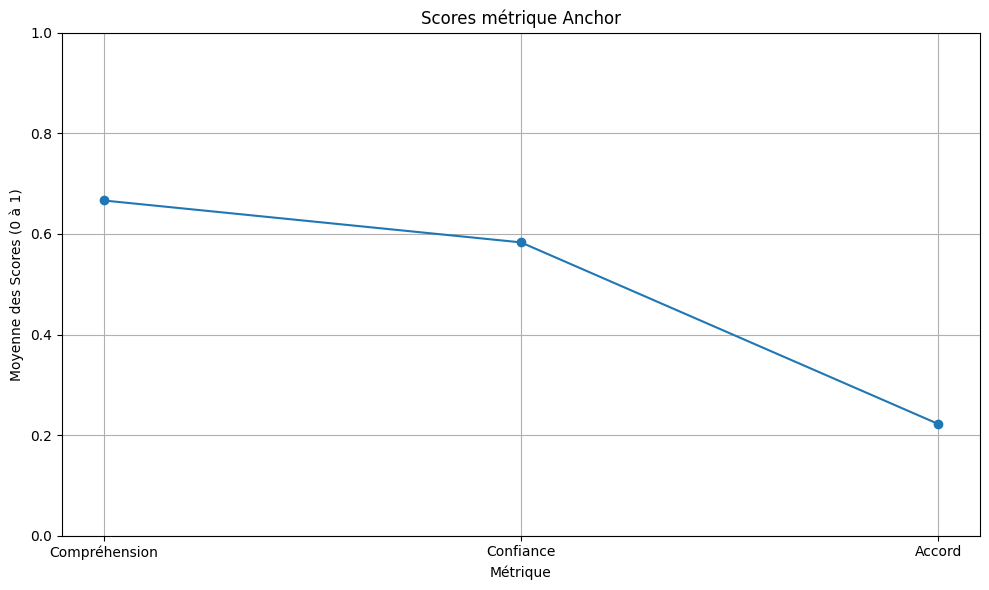

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

comprehension_columns = [
    'Explication 2 : Comprenez vous les explications fournies ?'
]
confidence_columns = [
    'Explication 2 : Avez vous confiance dans les explication fournies ?'
]
agreement_columns = [
    'Explication 2 : Seriez vous à l\'aise avec la décision qui concerne Océane mais aussi celle qui concerne Pierre ?'
]

df_comprehension = pd.melt(
    df,
    value_vars=comprehension_columns,
    var_name='Métrique',
    value_name='Réponse'
).replace({'Explication 2 : Comprenez vous les explications fournies ?': 'Compréhension'})

df_confidence = pd.melt(
    df,
    value_vars=confidence_columns,
    var_name='Métrique',
    value_name='Réponse'
).replace({'Explication 2 : Avez vous confiance dans les explication fournies ?': 'Confiance'})

df_agreement = pd.melt(
    df,
    value_vars=agreement_columns,
    var_name='Métrique',
    value_name='Réponse'
).replace({'Explication 2 : Seriez vous à l\'aise avec la décision qui concerne Océane mais aussi celle qui concerne Pierre ?': 'Accord'})

comprehension_mapping = {
    'Je ne comprends pas du tout les explications.': 0,
    'Je ne suis pas certain de comprendre.': 0.5,
    'Oui, tout me semble clair.': 1
}
confidence_mapping = {
    'Je n\'ai pas du tout confiance.': 0,
    'J\'ai un peu confiance.': 0.5,
    'Oui, j\'ai totalement confiance.': 1
}
agreement_mapping = {
    'Je ne serais pas à l\'aise dans les deux situations.': 0,
    'Je serais à l\'aise que dans le cas E+P+.': 0.5,
    "Je serais à l'aise que dans le cas E-P-.":0.5,
    'Oui je serais à l\'aise dans les deux cas.': 1,
    'Je serais à l\'aise pour les deux décisions.': 1,
    'Je ne suis à l\'aise que pour la décision d\'Océane (E-P-)':0.5,
    'Je ne suis à l\'aise que pour la décision de Pierre (E-P-)':0.5,
    'Que ce soit pour Océane ou pour Pierre je ne suis pas à l\'aise avec la décision.':0

}

df_comprehension['Score'] = df_comprehension['Réponse'].map(comprehension_mapping)
df_confidence['Score'] = df_confidence['Réponse'].map(confidence_mapping)
df_agreement['Score'] = df_agreement['Réponse'].map(agreement_mapping)

df_anchor_scores = pd.concat([
    df_comprehension.groupby('Métrique')['Score'].mean(),
    df_confidence.groupby('Métrique')['Score'].mean(),
    df_agreement.groupby('Métrique')['Score'].mean()
])

df_anchor_scores = df_anchor_scores.reset_index()

plt.figure(figsize=(10, 6))

plt.plot(df_anchor_scores['Métrique'], df_anchor_scores['Score'], marker='o', label='Anchor')

plt.title('Scores métrique Anchor')
plt.xlabel('Métrique')
plt.ylabel('Moyenne des Scores (0 à 1)')
plt.ylim(0, 1)
plt.grid(True)

plt.tight_layout()
plt.show()


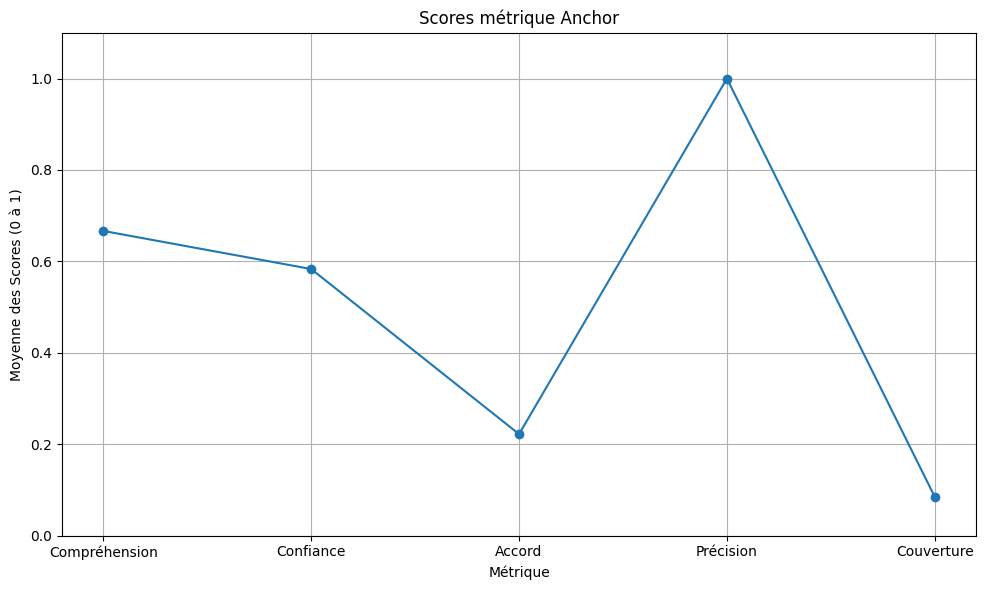

In [9]:

import pandas as pd
import matplotlib.pyplot as plt

new_data = pd.DataFrame({
    'Métrique': ['Précision', 'Couverture'],
    'Score': [1, 0.085]
})

df_anchor_scores_updated = pd.concat([df_anchor_scores, new_data], ignore_index=True)

plt.figure(figsize=(10, 6))

plt.plot(df_anchor_scores_updated['Métrique'], df_anchor_scores_updated['Score'], marker='o', label='Anchor')

plt.title('Scores métrique Anchor')
plt.xlabel('Métrique')
plt.ylabel('Moyenne des Scores (0 à 1)')
plt.ylim(0, 1.1)
plt.grid(True)

plt.tight_layout()
plt.show()


Moyenne des Niveaux de Compréhension par Explication et Niveau de Formation :

Niveau de formation : BTS et Licence
Explication
Anchor                 0.625
Decision Tree          0.500
Lime                   0.625
Logistic Regression    0.625
Naïve Bayes            0.750
PFI                    0.500
SHAP                   0.500
Name: BTS et Licence, dtype: float64

Niveau de formation : Bac
Explication
Anchor                 0.00
Decision Tree          0.25
Lime                   0.00
Logistic Regression    0.25
Naïve Bayes            0.50
PFI                    0.00
SHAP                   0.00
Name: Bac, dtype: float64

Niveau de formation : Master et > Bac + 5
Explication
Anchor                 0.791667
Decision Tree          0.791667
Lime                   0.583333
Logistic Regression    0.833333
Naïve Bayes            0.875000
PFI                    0.875000
SHAP                   0.375000
Name: Master et > Bac + 5, dtype: float64

Moyenne des Niveaux de Confiance par Explication 

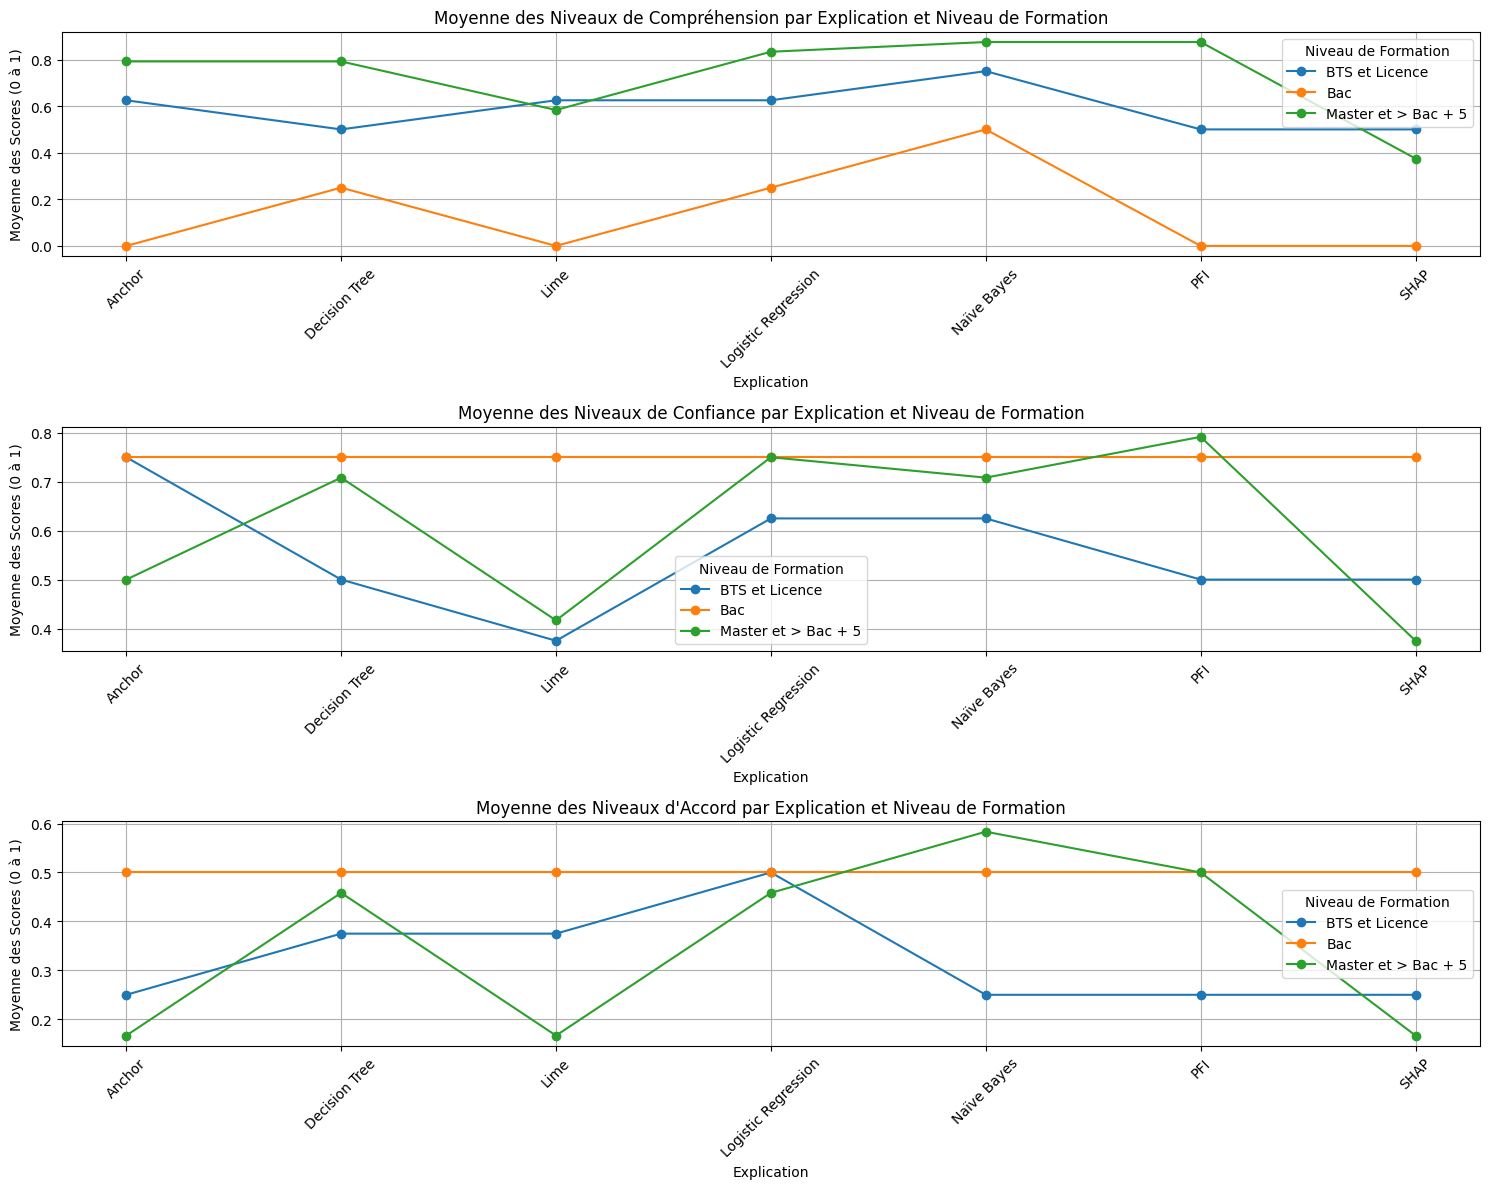

In [10]:
import matplotlib.pyplot as plt

df['Niveau de formation regroupé'] = df['Quel est votre dernier niveau de formation ou actuel ?   '].replace({
    'Bac générale': 'Bac',
    'Bac Pro': 'Bac',
    'BTS (ou équivalent Bac+2)': 'BTS et Licence',
    'Licence (ou équivalent Bac+3)': 'BTS et Licence',
    'Master / Ingénieur (ou équivalent Bac + 5)': 'Master et > Bac + 5',
    '> Bac + 5': 'Master et > Bac + 5'
})

comprehension_columns = [
    'Explication 1 : Comprenez vous les explications fournies ?',
    'Explication 2 : Comprenez vous les explications fournies ?',
    'Explication 3 : Comprenez vous les explications fournies ?',
    'Explication 4 : Comprenez vous les explications fournies ?',
    'Explication 5 : Comprenez vous les explications fournies ?',
    'Explication 6 : Comprenez vous les explications fournies ?',
    'Explication 7 : Comprenez vous les explications fournies ?'
]
confidence_columns = [
    'Explication 1 : Avez vous confiance dans les explication fournies ?',
    'Explication 2 : Avez vous confiance dans les explication fournies ?',
    'Explication 3 : Avez vous confiance dans les explications fournies ?',
    'Explication 4 : Avez vous confiance dans les explication fournis ?',
    'Explication 5 : Avez vous confiance dans les explications fournies ?',
    'Explication 6 : Avez vous confiance dans les explications fournies ?',
    'Explication 7 : Avez vous confiance dans les explications fournies ?'
]
agreement_columns = [
    'Explication 1 : Seriez vous à l\'aise avec la décision qui concerne Océane mais aussi celle qui concerne Pierre ?',
    'Explication 2 : Seriez vous à l\'aise avec la décision qui concerne Océane mais aussi celle qui concerne Pierre ?',
    'Explication 3 : Seriez vous à l\'aise avec la décision qui concerne Océane mais aussi celle qui concerne Pierre ?',
    'Explication 4 : Seriez vous à l\'aise si un étudiant était catégorisé E+P+ à l\'aide des explications fournies ? E-P- ?',
    'Explication 5 : Seriez vous à l\'aise si un étudiant était catégorisé E+P+ à l\'aide des explications fournies ? E-P- ?',
    'Explication 6 : Seriez vous à l\'aise si un étudiant était catégorisé E+P+ à l\'aide des explications fournies ? E-P- ?',
    'Explication 7 : Seriez vous à l\'aise si un étudiant était catégorisé E+P+ à l\'aide des explications fournies ? E-P- ?',
]

new_labels = {
    'Explication 1 : Comprenez vous les explications fournies ?': 'Lime',
    'Explication 2 : Comprenez vous les explications fournies ?': 'Anchor',
    'Explication 3 : Comprenez vous les explications fournies ?': 'SHAP',
    'Explication 4 : Comprenez vous les explications fournies ?': 'Decision Tree',
    'Explication 5 : Comprenez vous les explications fournies ?': 'Naïve Bayes',
    'Explication 6 : Comprenez vous les explications fournies ?': 'Logistic Regression',
    'Explication 7 : Comprenez vous les explications fournies ?': 'PFI',
    'Explication 1 : Avez vous confiance dans les explication fournies ?': 'Lime',
    'Explication 2 : Avez vous confiance dans les explication fournies ?': 'Anchor',
    'Explication 3 : Avez vous confiance dans les explications fournies ?': 'SHAP',
    'Explication 4 : Avez vous confiance dans les explication fournis ?': 'Decision Tree',
    'Explication 5 : Avez vous confiance dans les explications fournies ?': 'Naïve Bayes',
    'Explication 6 : Avez vous confiance dans les explications fournies ?': 'Logistic Regression',
    'Explication 7 : Avez vous confiance dans les explications fournies ?': 'PFI',
    'Explication 1 : Seriez vous à l\'aise avec la décision qui concerne Océane mais aussi celle qui concerne Pierre ?': 'Lime',
    'Explication 2 : Seriez vous à l\'aise avec la décision qui concerne Océane mais aussi celle qui concerne Pierre ?': 'Anchor',
    'Explication 3 : Seriez vous à l\'aise avec la décision qui concerne Océane mais aussi celle qui concerne Pierre ?': 'SHAP',
    'Explication 4 : Seriez vous à l\'aise si un étudiant était catégorisé E+P+ à l\'aide des explications fournies ? E-P- ?': 'Decision Tree',
    'Explication 5 : Seriez vous à l\'aise si un étudiant était catégorisé E+P+ à l\'aide des explications fournies ? E-P- ?': 'Naïve Bayes',
    'Explication 6 : Seriez vous à l\'aise si un étudiant était catégorisé E+P+ à l\'aide des explications fournies ? E-P- ?': 'Logistic Regression',
    'Explication 7 : Seriez vous à l\'aise si un étudiant était catégorisé E+P+ à l\'aide des explications fournies ? E-P- ?': 'PFI'
}

df_melted_comprehension = df.melt(
    id_vars=['Niveau de formation regroupé'],
    value_vars=comprehension_columns,
    var_name='Explication',
    value_name='Compréhension'
).replace({'Explication': new_labels})

df_melted_confidence = df.melt(
    id_vars=['Niveau de formation regroupé'],
    value_vars=confidence_columns,
    var_name='Explication',
    value_name='Confiance'
).replace({'Explication': new_labels})

df_melted_agreement = df.melt(
    id_vars=['Niveau de formation regroupé'],
    value_vars=agreement_columns,
    var_name='Explication',
    value_name='Accord'
).replace({'Explication': new_labels})

comprehension_mapping = {
    'Je ne comprends pas du tout les explications.': 0,
    'Je ne suis pas certain de comprendre.': 0.5,
    'Oui, tout me semble clair.': 1
}

confidence_mapping = {
    'Je n\'ai pas du tout confiance.': 0,
    'J\'ai un peu confiance.': 0.5,
    'Oui, j\'ai totalement confiance.': 1
}

agreement_mapping = {
    'Je ne serais pas à l\'aise dans les deux situations.': 0,
    'Je serais à l\'aise que dans le cas E+P+.': 0.5,
    "Je serais à l'aise que dans le cas E-P-.": 0.5,
    'Oui je serais à l\'aise dans les deux cas.': 1,
    'Je serais à l\'aise pour les deux décisions.': 1,
    'Je ne suis à l\'aise que pour la décision d\'Océane (E-P-)': 0.5,
    'Je ne suis à l\'aise que pour la décision de Pierre (E-P-)': 0.5,
    'Que ce soit pour Océane ou pour Pierre je ne suis pas à l\'aise avec la décision.': 0
}

df_melted_comprehension['Compréhension'] = df_melted_comprehension['Compréhension'].map(comprehension_mapping)
df_melted_confidence['Confiance'] = df_melted_confidence['Confiance'].map(confidence_mapping)
df_melted_agreement['Accord'] = df_melted_agreement['Accord'].map(agreement_mapping)

mean_comprehension_scores = df_melted_comprehension.groupby(['Explication', 'Niveau de formation regroupé'])['Compréhension'].mean().unstack()
mean_confidence_scores = df_melted_confidence.groupby(['Explication', 'Niveau de formation regroupé'])['Confiance'].mean().unstack()
mean_agreement_scores = df_melted_agreement.groupby(['Explication', 'Niveau de formation regroupé'])['Accord'].mean().unstack()

print("Moyenne des Niveaux de Compréhension par Explication et Niveau de Formation :")
for level in mean_comprehension_scores.columns:
    print(f"\nNiveau de formation : {level}")
    print(mean_comprehension_scores[level])

print("\nMoyenne des Niveaux de Confiance par Explication et Niveau de Formation :")
for level in mean_confidence_scores.columns:
    print(f"\nNiveau de formation : {level}")
    print(mean_confidence_scores[level])

print("\nMoyenne des Niveaux d'Accord par Explication et Niveau de Formation :")
for level in mean_agreement_scores.columns:
    print(f"\nNiveau de formation : {level}")
    print(mean_agreement_scores[level])

plt.figure(figsize=(15, 12))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

plt.subplot(3, 1, 1)
for i, level in enumerate(mean_comprehension_scores.columns):
    plt.plot(
        mean_comprehension_scores.index,
        mean_comprehension_scores[level],
        marker='o',
        label=level,
        color=colors[i % len(colors)]
    )
plt.title('Moyenne des Niveaux de Compréhension par Explication et Niveau de Formation')
plt.xlabel('Explication')
plt.ylabel('Moyenne des Scores (0 à 1)')
plt.xticks(rotation=45)
plt.legend(title='Niveau de Formation')
plt.grid(True)

plt.subplot(3, 1, 2)
for i, level in enumerate(mean_confidence_scores.columns):
    plt.plot(
        mean_confidence_scores.index,
        mean_confidence_scores[level],
        marker='o',
        label=level,
        color=colors[i % len(colors)]
    )
plt.title('Moyenne des Niveaux de Confiance par Explication et Niveau de Formation')
plt.xlabel('Explication')
plt.ylabel('Moyenne des Scores (0 à 1)')
plt.xticks(rotation=45)
plt.legend(title='Niveau de Formation')
plt.grid(True)

plt.subplot(3, 1, 3)
for i, level in enumerate(mean_agreement_scores.columns):
    valid_data = mean_agreement_scores[level].dropna()
    plt.plot(
        valid_data.index,
        valid_data,
        marker='o',
        label=level,
        color=colors[i % len(colors)]
    )
plt.title('Moyenne des Niveaux d\'Accord par Explication et Niveau de Formation')
plt.xlabel('Explication')
plt.ylabel('Moyenne des Scores (0 à 1)')
plt.xticks(rotation=45)
plt.legend(title='Niveau de Formation')
plt.grid(True)

plt.tight_layout()
plt.show()


In [11]:
import pandas as pd

data = {
    'Bac': {
        'Anchor': 0.00,
        'Decision Tree': 0.25,
        'Lime': 0.00,
        'Logistic Regression': 0.25,
        'Naïve Bayes': 0.50,
        'PFI': 0.00,
        'SHAP': 0.00
    },
    'BTS et Licence': {
        'Anchor': 0.625,
        'Decision Tree': 0.50,
        'Lime': 0.625,
        'Logistic Regression': 0.625,
        'Naïve Bayes': 0.75,
        'PFI': 0.50,
        'SHAP': 0.50
    },
    'Master et > Bac + 5': {
        'Anchor': 0.791667,
        'Decision Tree': 0.791667,
        'Lime': 0.583333,
        'Logistic Regression': 0.833333,
        'Naïve Bayes': 0.875,
        'PFI': 0.875,
        'SHAP': 0.375
    }
}

df = pd.DataFrame(data)

std_dev = df.std(axis=1)

print("Écart-type de la compréhension pour chaque explication à travers les niveaux de formation :")
print(std_dev)


Écart-type de la compréhension pour chaque explication à travers les niveaux de formation :
Anchor                 0.417361
Decision Tree          0.271100
Lime                   0.349437
Logistic Regression    0.295608
Naïve Bayes            0.190941
PFI                    0.438986
SHAP                   0.260208
dtype: float64


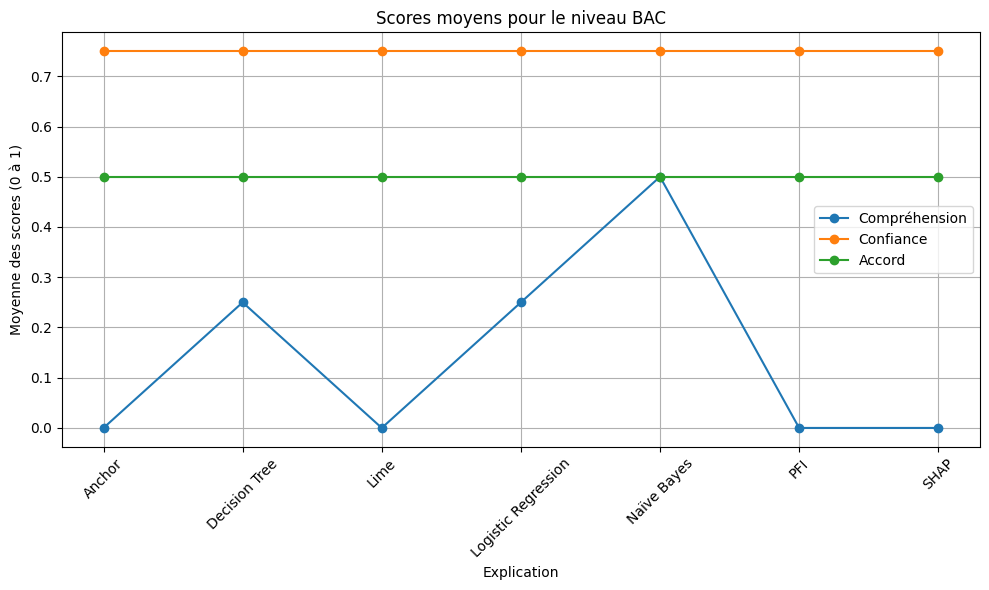

In [12]:
mean_comprehension_bac = mean_comprehension_scores['Bac']
mean_confidence_bac = mean_confidence_scores['Bac']
mean_agreement_bac = mean_agreement_scores['Bac']

plt.figure(figsize=(10, 6))

plt.plot(mean_comprehension_bac.index, mean_comprehension_bac, marker='o', label='Compréhension')
plt.plot(mean_confidence_bac.index, mean_confidence_bac, marker='o', label='Confiance')

valid_agreement_bac = mean_agreement_bac.dropna()
plt.plot(valid_agreement_bac.index, valid_agreement_bac, marker='o', label='Accord')

plt.title('Scores moyens pour le niveau BAC')
plt.xlabel('Explication')
plt.ylabel('Moyenne des scores (0 à 1)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [13]:
df = pd.read_excel('./results.xlsx',header=0)

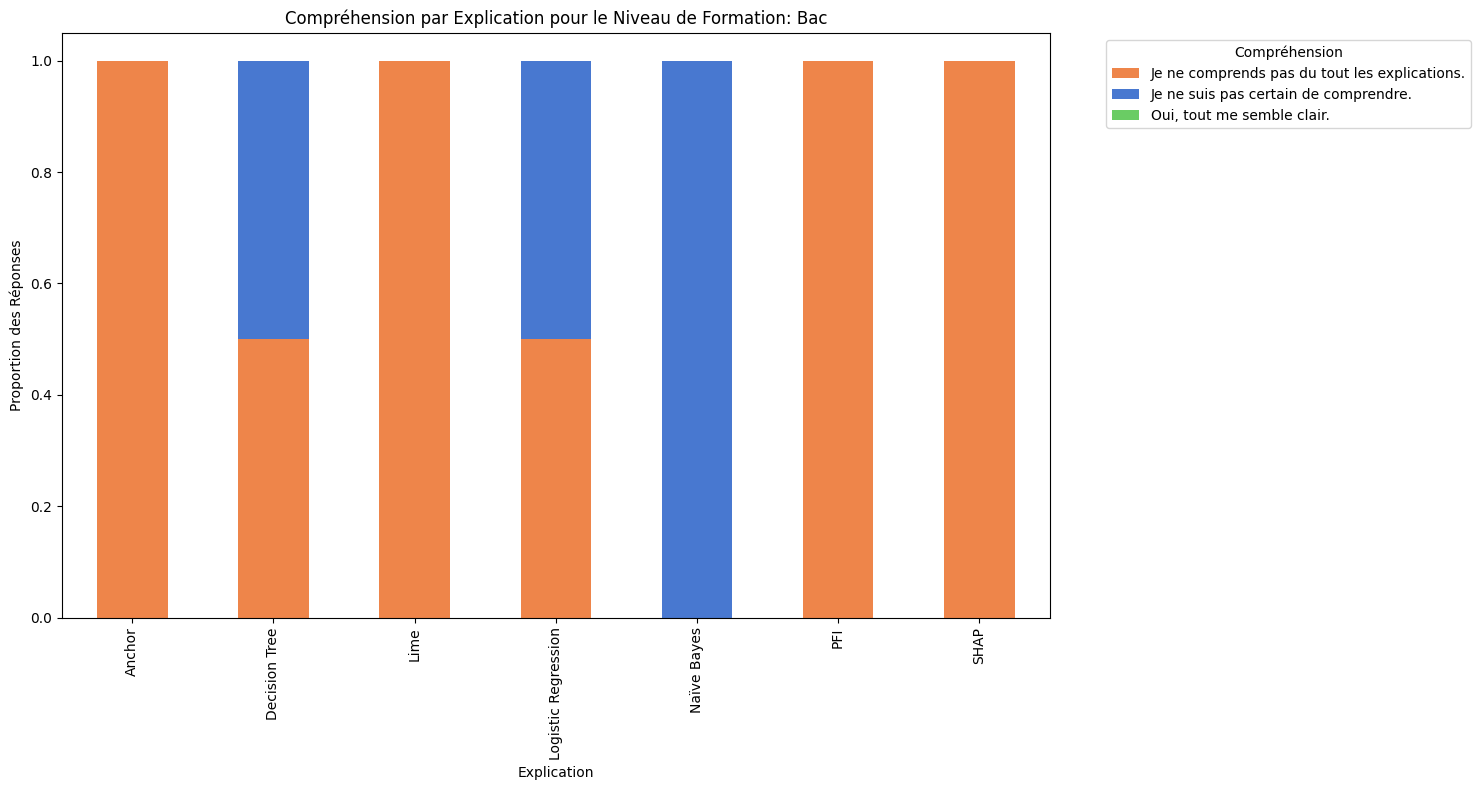

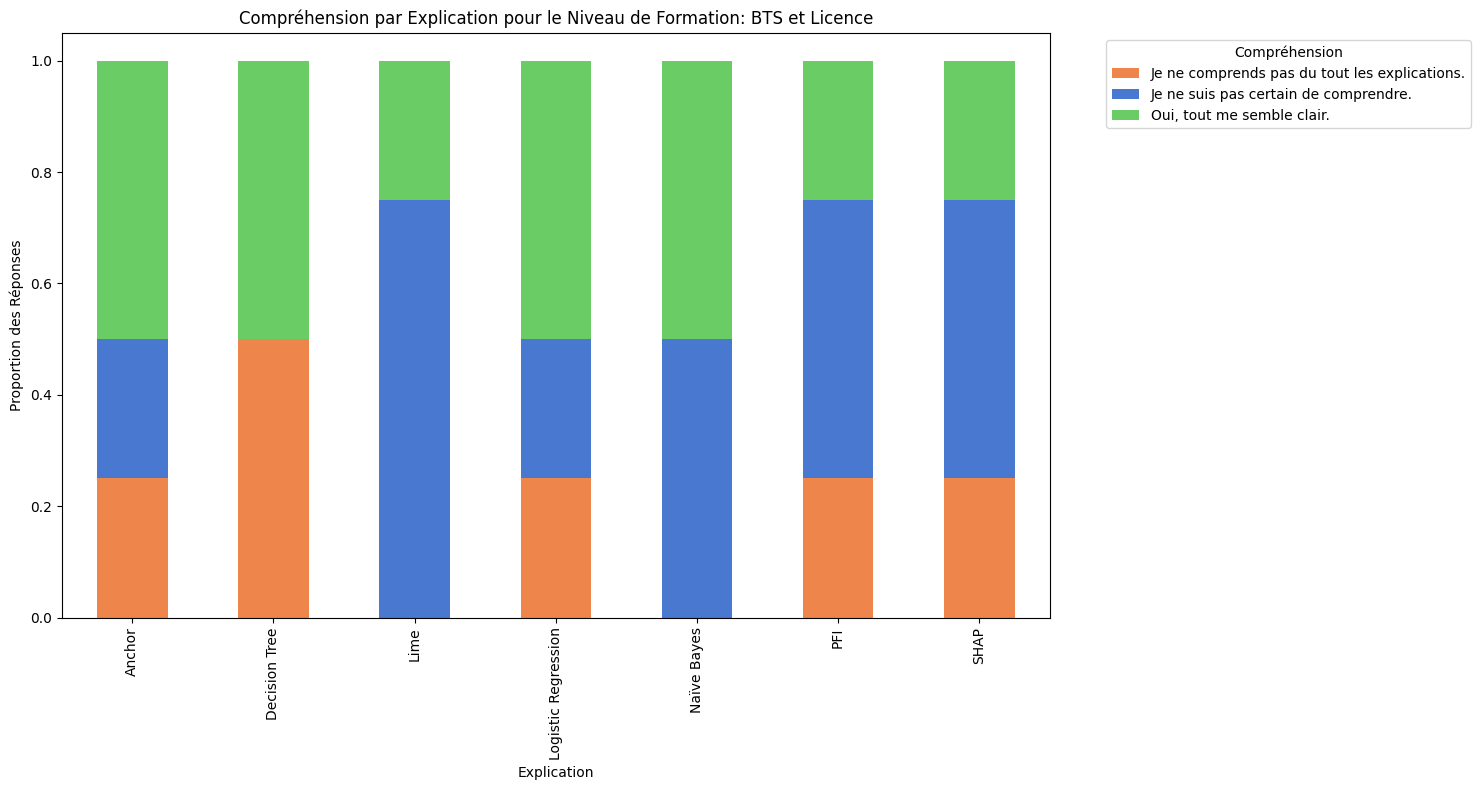

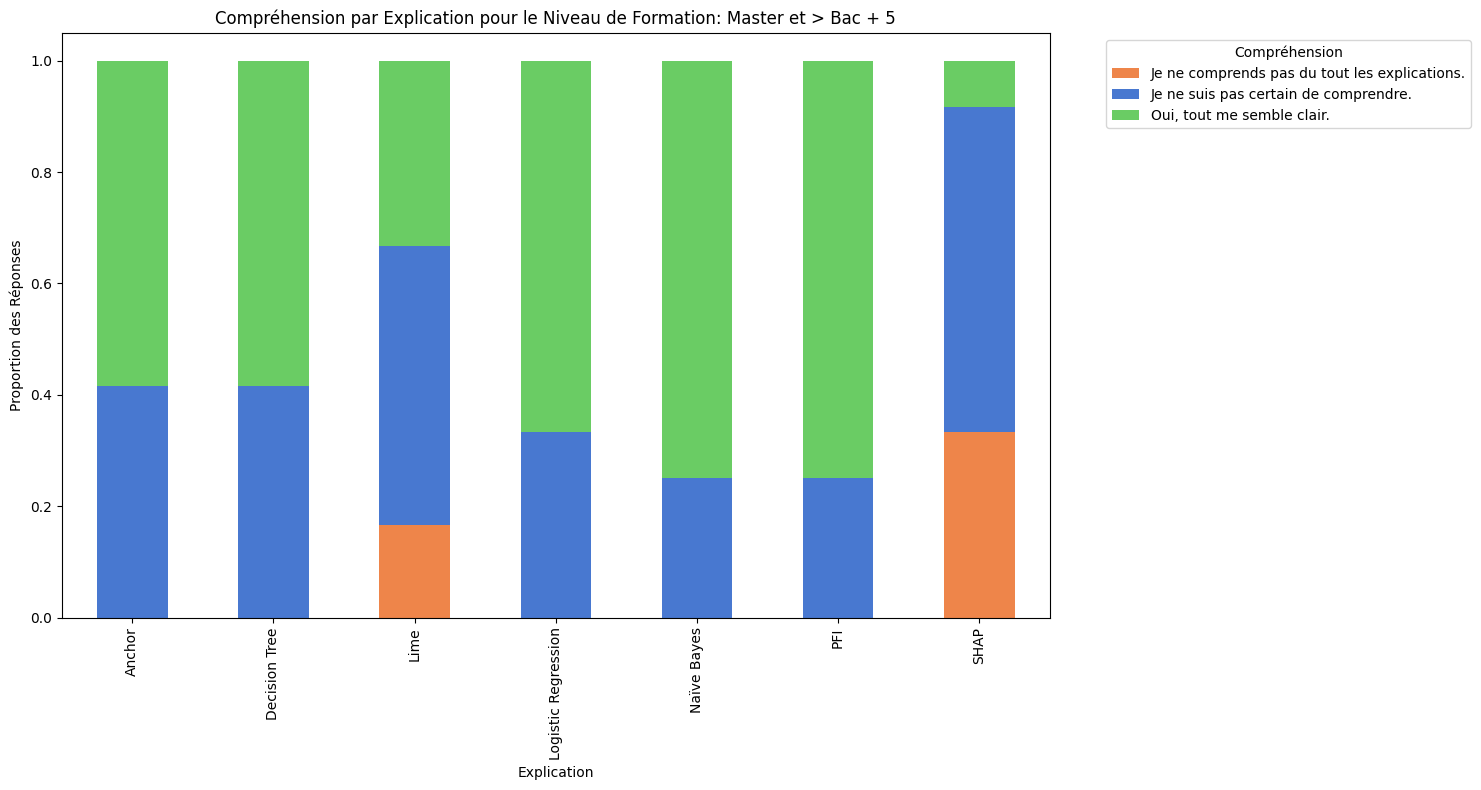

In [14]:
import pandas as pd
import matplotlib.pyplot as plt


df['Niveau de formation regroupé'] = df['Quel est votre dernier niveau de formation ou actuel ?   '].replace({
    'Bac générale': 'Bac',
    'Bac Pro': 'Bac',
    'BTS (ou équivalent Bac+2)': 'BTS et Licence',
    'Licence (ou équivalent Bac+3)': 'BTS et Licence',
    'Master / Ingénieur (ou équivalent Bac + 5)': 'Master et > Bac + 5',
    '> Bac + 5': 'Master et > Bac + 5'
})

comprehension_columns = [
    'Explication 1 : Comprenez vous les explications fournies ?',
    'Explication 2 : Comprenez vous les explications fournies ?',
    'Explication 3 : Comprenez vous les explications fournies ?',
    'Explication 4 : Comprenez vous les explications fournies ?',
    'Explication 5 : Comprenez vous les explications fournies ?',
    'Explication 6 : Comprenez vous les explications fournies ?',
    'Explication 7 : Comprenez vous les explications fournies ?'
]

new_labels = {
    'Explication 1 : Comprenez vous les explications fournies ?': 'Lime',
    'Explication 2 : Comprenez vous les explications fournies ?': 'Anchor',
    'Explication 3 : Comprenez vous les explications fournies ?': 'SHAP',
    'Explication 4 : Comprenez vous les explications fournies ?': 'Decision Tree',
    'Explication 5 : Comprenez vous les explications fournies ?': 'Naïve Bayes',
    'Explication 6 : Comprenez vous les explications fournies ?': 'Logistic Regression',
    'Explication 7 : Comprenez vous les explications fournies ?': 'PFI'
}

df_melted = df.melt(
    id_vars=['Niveau de formation regroupé'],
    value_vars=comprehension_columns,
    var_name='Explication',
    value_name='Compréhension'
)

df_melted['Explication'] = df_melted['Explication'].replace(new_labels)

comprehension_distribution_explications_new_labels = df_melted.groupby(['Niveau de formation regroupé', 'Explication', 'Compréhension']).size().unstack().fillna(0)

comprehension_distribution_explications_new_labels = comprehension_distribution_explications_new_labels.div(comprehension_distribution_explications_new_labels.sum(axis=1), axis=0)

color_mapping = {
    'Je ne comprends pas du tout les explications.': colors_palette[1],
    'Je ne suis pas certain de comprendre.': colors_palette[0],
    'Oui, tout me semble clair.': colors_palette[2]
}

colors = [color_mapping.get(level, 'gray') for level in comprehension_distribution_explications_new_labels.columns]

ordered_levels_corrected = ['Bac', 'BTS et Licence', 'Master et > Bac + 5']
for level in ordered_levels_corrected:
    comprehension_distribution_explications_new_labels.loc[level].plot(kind='bar', stacked=True, figsize=(15, 8), color=colors)
    plt.title(f'Compréhension par Explication pour le Niveau de Formation: {level}')
    plt.xlabel('Explication')
    plt.ylabel('Proportion des Réponses')
    plt.legend(title='Compréhension', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


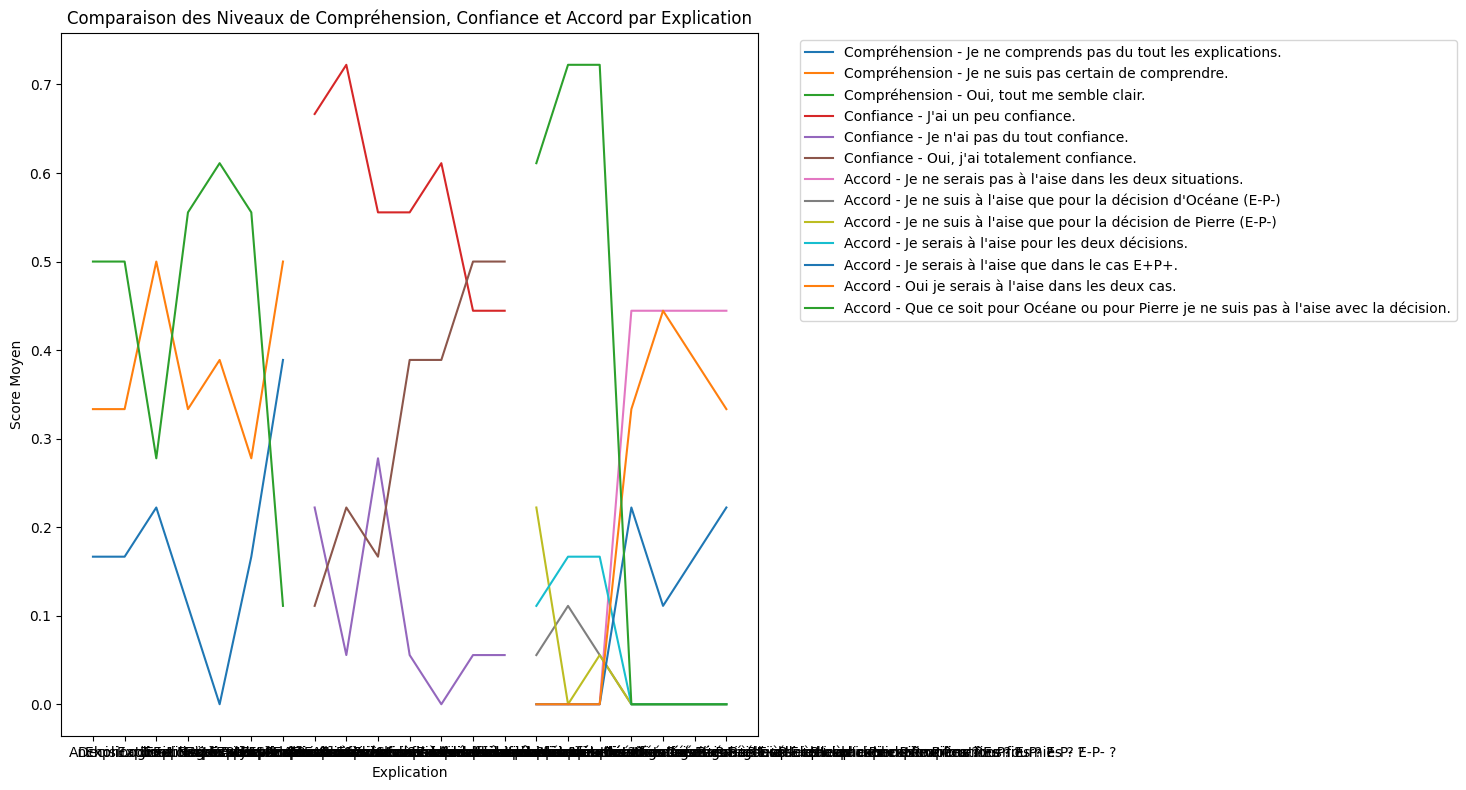

In [15]:
comprehension_columns = [
    'Explication 1 : Comprenez vous les explications fournies ?',
    'Explication 2 : Comprenez vous les explications fournies ?',
    'Explication 3 : Comprenez vous les explications fournies ?',
    'Explication 4 : Comprenez vous les explications fournies ?',
    'Explication 5 : Comprenez vous les explications fournies ?',
    'Explication 6 : Comprenez vous les explications fournies ?',
    'Explication 7 : Comprenez vous les explications fournies ?'
]
confidence_columns = [
    'Explication 1 : Avez vous confiance dans les explication fournies ?',
    'Explication 2 : Avez vous confiance dans les explication fournies ?',
    'Explication 3 : Avez vous confiance dans les explications fournies ?',
    'Explication 4 : Avez vous confiance dans les explication fournis ?',
    'Explication 5 : Avez vous confiance dans les explications fournies ?',
    'Explication 6 : Avez vous confiance dans les explications fournies ?',
    'Explication 7 : Avez vous confiance dans les explications fournies ?'
]
agreement_columns = [
    'Explication 1 : Seriez vous à l\'aise avec la décision qui concerne Océane mais aussi celle qui concerne Pierre ?',
    'Explication 2 : Seriez vous à l\'aise avec la décision qui concerne Océane mais aussi celle qui concerne Pierre ?',
    'Explication 3 : Seriez vous à l\'aise avec la décision qui concerne Océane mais aussi celle qui concerne Pierre ?',
    'Explication 4 : Seriez vous à l\'aise si un étudiant était catégorisé E+P+ à l\'aide des explications fournies ? E-P- ?',
    'Explication 5 : Seriez vous à l\'aise si un étudiant était catégorisé E+P+ à l\'aide des explications fournies ? E-P- ?',
    'Explication 6 : Seriez vous à l\'aise si un étudiant était catégorisé E+P+ à l\'aide des explications fournies ? E-P- ?',
    'Explication 7 : Seriez vous à l\'aise si un étudiant était catégorisé E+P+ à l\'aide des explications fournies ? E-P- ?',
]

new_labels = {
    'Explication 1 : Comprenez vous les explications fournies ?': 'Lime',
    'Explication 2 : Comprenez vous les explications fournies ?': 'Anchor',
    'Explication 3 : Comprenez vous les explications fournies ?': 'SHAP',
    'Explication 4 : Comprenez vous les explications fournies ?': 'Decision Tree',
    'Explication 5 : Comprenez vous les explications fournies ?': 'Naïve Bayes',
    'Explication 6 : Comprenez vous les explications fournies ?': 'Logistic Regression',
    'Explication 7 : Comprenez vous les explications fournies ?': 'PFI',
    'Explication 1 : Avez vous confiance dans l\'explication fournie ?': 'Lime',
    'Explication 2 : Avez vous confiance dans l\'explication fournie ?': 'Anchor',
    'Explication 3 : Avez vous confiance dans l\'explication fournie ?': 'SHAP',
    'Explication 4 : Avez vous confiance dans l\'explication fournie ?': 'Decision Tree',
    'Explication 5 : Avez vous confiance dans l\'explication fournie ?': 'Naïve Bayes',
    'Explication 6 : Avez vous confiance dans l\'explication fournie ?': 'Logistic Regression',
    'Explication 7 : Avez vous confiance dans l\'explication fournie ?': 'PFI',
    'Explication 1 : Etes vous d\'accord avec l\'explication fournie ?': 'Lime',
    'Explication 2 : Etes vous d\'accord avec l\'explication fournie ?': 'Anchor',
    'Explication 3 : Etes vous d\'accord avec l\'explication fournie ?': 'SHAP',
    'Explication 4 : Etes vous d\'accord avec l\'explication fournie ?': 'Decision Tree',
    'Explication 5 : Etes vous d\'accord avec l\'explication fournie ?': 'Naïve Bayes',
    'Explication 6 : Etes vous d\'accord avec l\'explication fournie ?': 'Logistic Regression',
    'Explication 7 : Etes vous d\'accord avec l\'explication fournie ?': 'PFI'
}

df_melted_comprehension = df.melt(
    id_vars=['Niveau de formation regroupé'],
    value_vars=comprehension_columns,
    var_name='Explication',
    value_name='Compréhension'
)
df_melted_confidence = df.melt(
    id_vars=['Niveau de formation regroupé'],
    value_vars=confidence_columns,
    var_name='Explication',
    value_name='Confiance'
)
df_melted_agreement = df.melt(
    id_vars=['Niveau de formation regroupé'],
    value_vars=agreement_columns,
    var_name='Explication',
    value_name='Accord'
)

df_melted_comprehension['Explication'] = df_melted_comprehension['Explication'].replace(new_labels)
df_melted_confidence['Explication'] = df_melted_confidence['Explication'].replace(new_labels)
df_melted_agreement['Explication'] = df_melted_agreement['Explication'].replace(new_labels)

mean_comprehension_scores = df_melted_comprehension.groupby(['Explication', 'Compréhension'])['Compréhension'].count().unstack().fillna(0)
mean_confidence_scores = df_melted_confidence.groupby(['Explication', 'Confiance'])['Confiance'].count().unstack().fillna(0)
mean_agreement_scores = df_melted_agreement.groupby(['Explication', 'Accord'])['Accord'].count().unstack().fillna(0)

mean_comprehension_scores = mean_comprehension_scores.div(mean_comprehension_scores.sum(axis=1), axis=0)
mean_confidence_scores = mean_confidence_scores.div(mean_confidence_scores.sum(axis=1), axis=0)
mean_agreement_scores = mean_agreement_scores.div(mean_agreement_scores.sum(axis=1), axis=0)

plt.figure(figsize=(15, 8))

for comprehension_level in mean_comprehension_scores.columns:
    plt.plot(mean_comprehension_scores.index, mean_comprehension_scores[comprehension_level], label=f'Compréhension - {comprehension_level}')

for confidence_level in mean_confidence_scores.columns:
    plt.plot(mean_confidence_scores.index, mean_confidence_scores[confidence_level], label=f'Confiance - {confidence_level}')

for agreement_level in mean_agreement_scores.columns:
    plt.plot(mean_agreement_scores.index, mean_agreement_scores[agreement_level], label=f'Accord - {agreement_level}')

plt.title('Comparaison des Niveaux de Compréhension, Confiance et Accord par Explication')
plt.xlabel('Explication')
plt.ylabel('Score Moyen')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


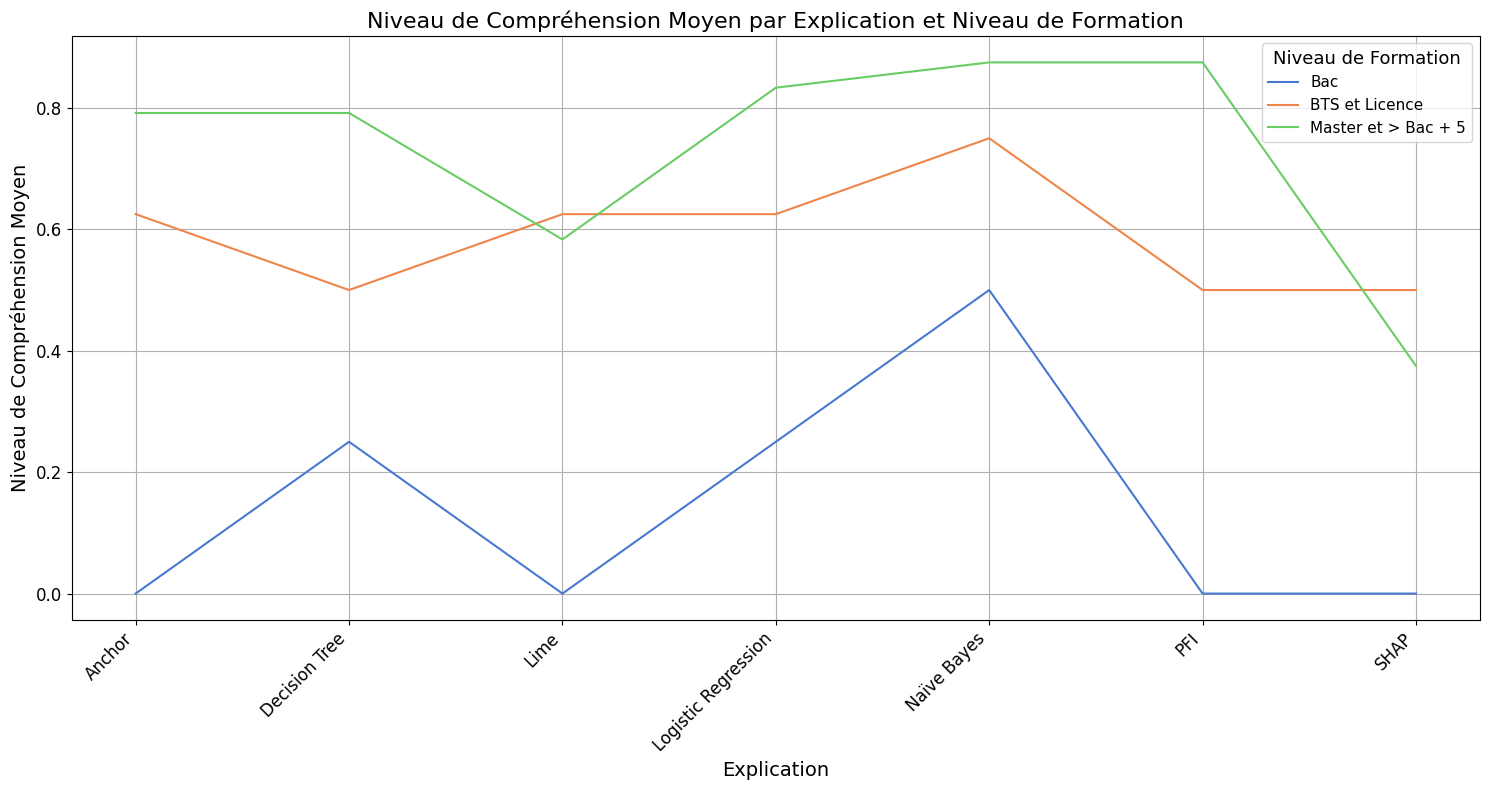

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

comprehension_mapping = {
    'Je ne comprends pas du tout les explications.': 0,
    'Je ne suis pas certain de comprendre.': 0.5,
    'Oui, tout me semble clair.': 1
}

df_melted['Compréhension Numérique'] = df_melted['Compréhension'].map(comprehension_mapping)

average_comprehension = df_melted.groupby(['Niveau de formation regroupé', 'Explication'])['Compréhension Numérique'].mean().unstack()

plt.figure(figsize=(15, 8))
colors = [colors_palette[0], colors_palette[1], colors_palette[2], colors_palette[3], colors_palette[4]]

for i, level in enumerate(ordered_levels_corrected):
    if level in average_comprehension.index:
        plt.plot(
            average_comprehension.columns,
            average_comprehension.loc[level],
            label=level,
            color=colors[i % len(colors)]
        )

plt.title('Niveau de Compréhension Moyen par Explication et Niveau de Formation', fontsize=16)
plt.xlabel('Explication', fontsize=14)
plt.ylabel('Niveau de Compréhension Moyen', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Niveau de Formation', title_fontsize='13', fontsize='11')
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:
df.columns

Index(['Horodateur', 'Laquelle de ces situations vous correspond le plus :  ',
       'Quel est votre dernier niveau de formation ou actuel ?   ',
       'Précisez :',
       'Travaillez vous, effectuez vous ou Avez-vous effectué des études dans le domaine informatique ?',
       'Vous sentez vous concerné par les algorithmes de prise de décision automatique ?',
       'Êtes-vous inquiet que de telle technique puisse être employées dans différents domaines (éducation, juridique, médical …) ?',
       'Êtes-vous familier avec les données du domaine d'étude (cours en ligne) ? ',
       'Êtes-vous familier avec la notion d’Intelligence artificielle et de machine Learning ?',
       'Avez-vous déjà utilisé des outils d’IA ou de machine Learning ?',
       'Connaissez vous des modèles de machine Learning interprétables et ou des méthodes d’explicabilités ?',
       'Lesquelles ?',
       'Explication 1 : Comprenez vous les explications fournies ?',
       'Explication 1 : Avez vous confianc

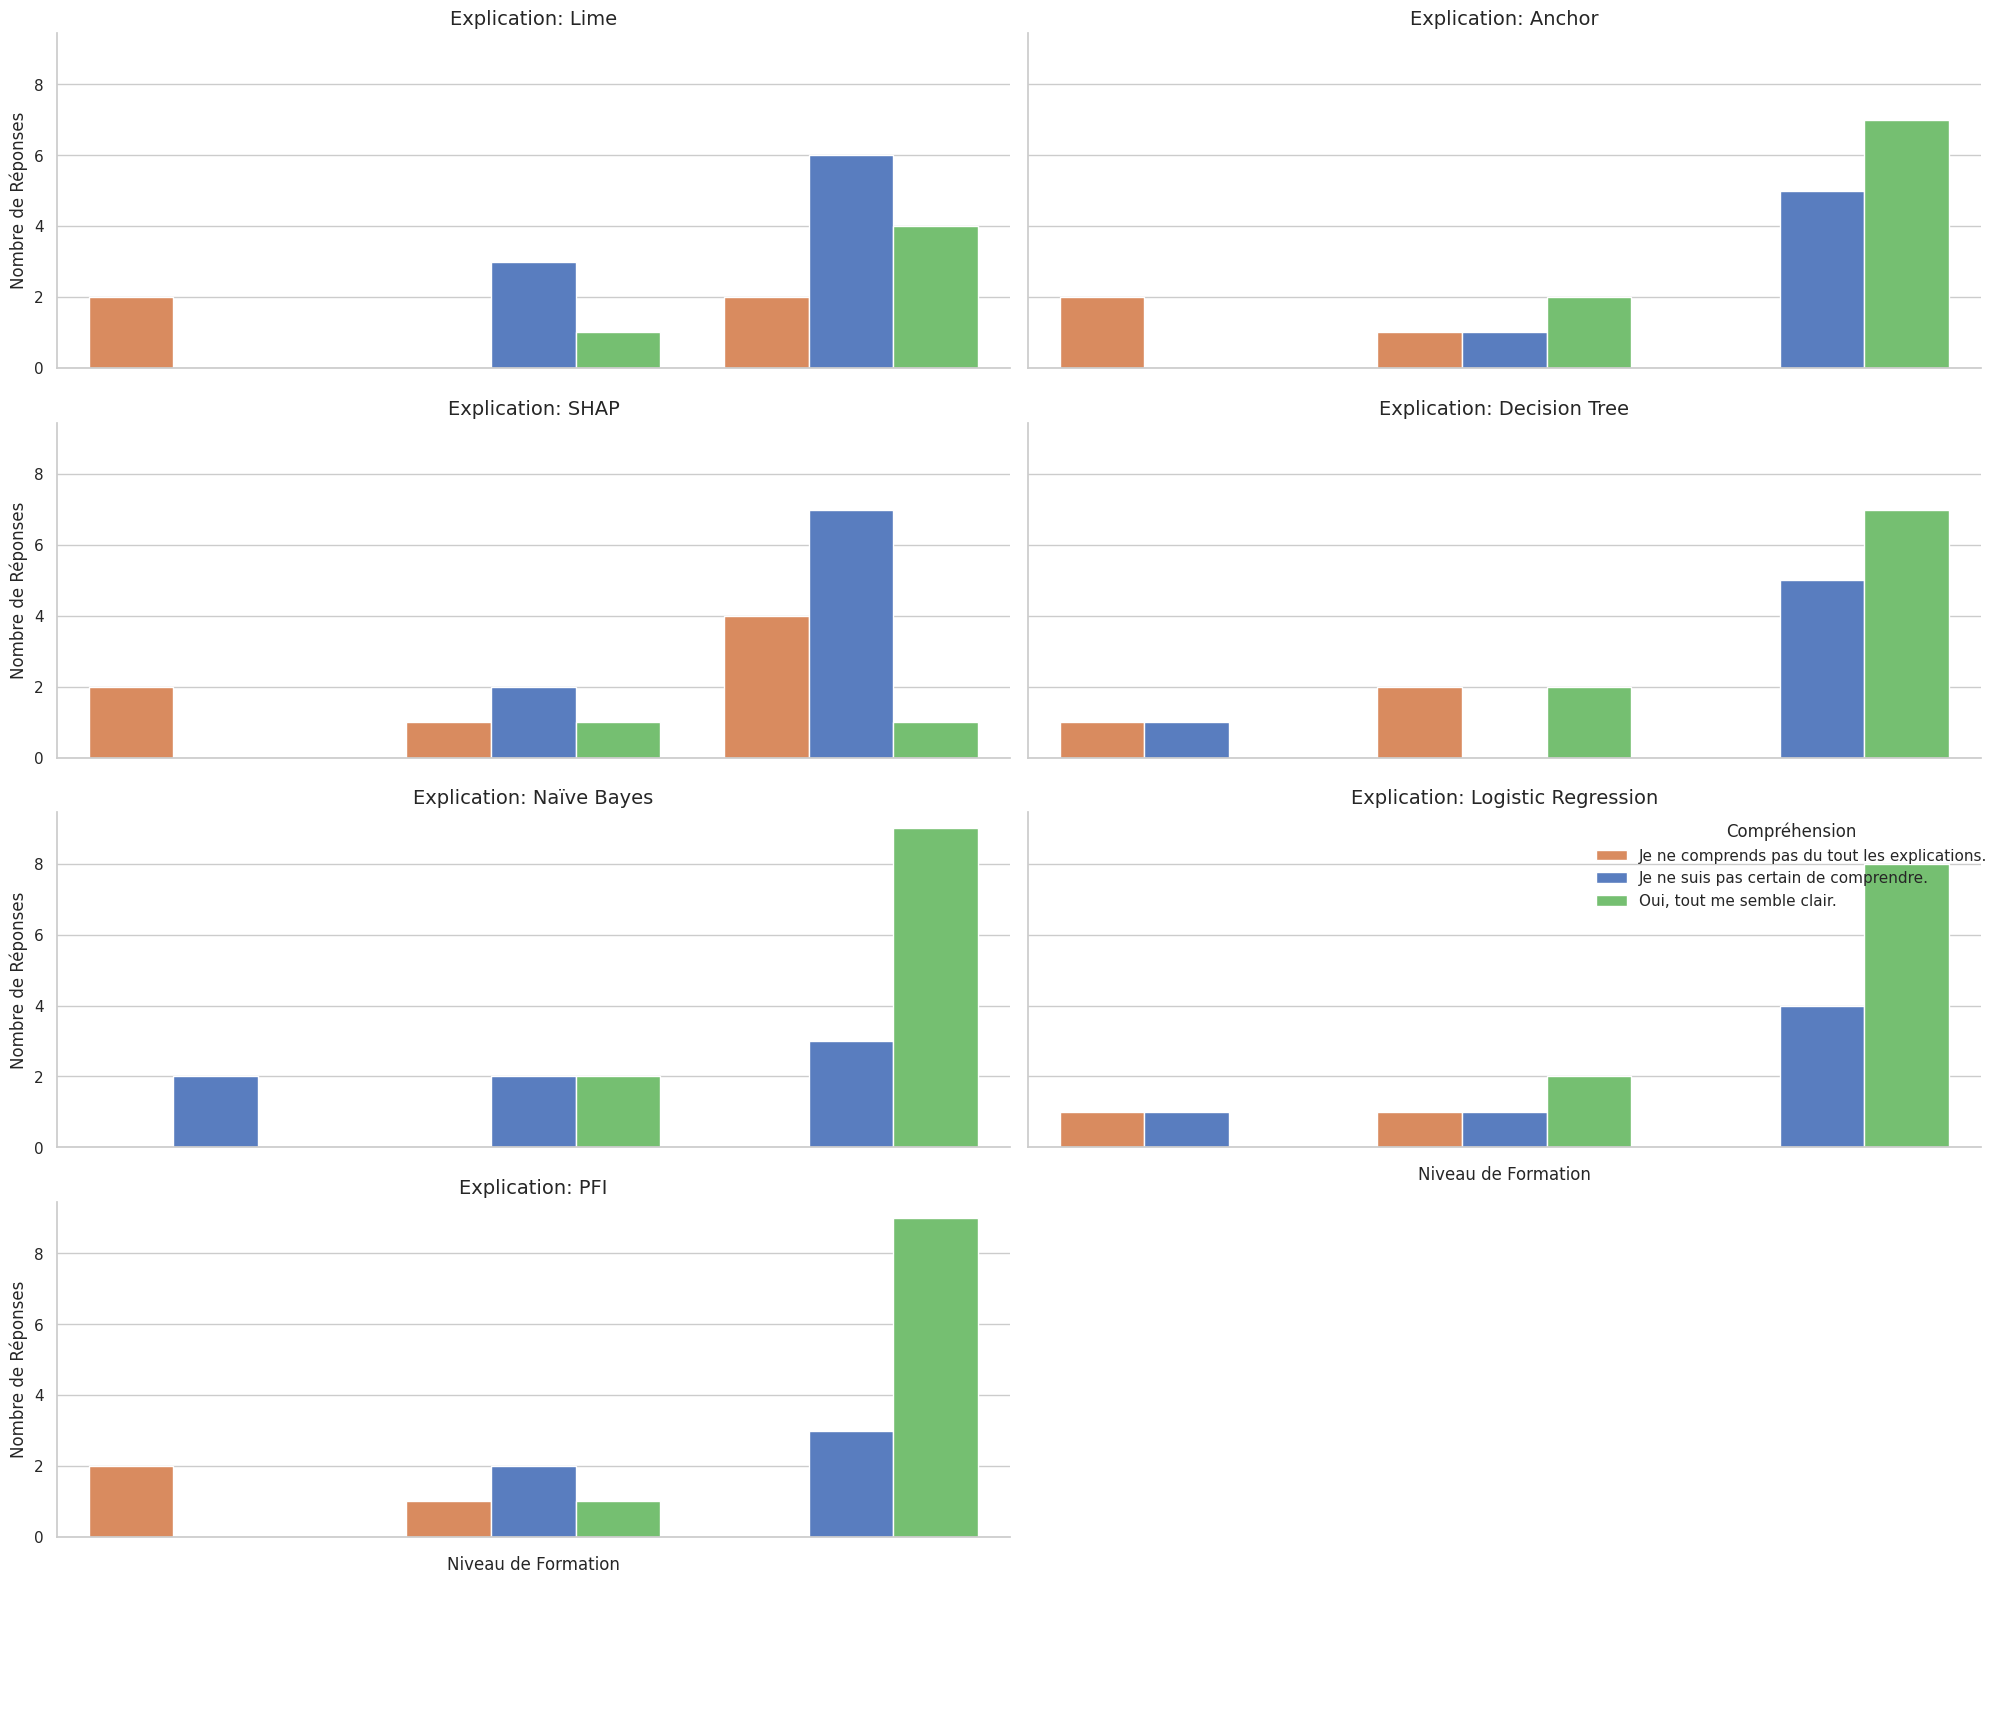

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

g = sns.catplot(
    data=df_melted,
    kind='count',
    x='Niveau de formation regroupé',
    hue='Compréhension',
    col='Explication',
    palette=color_mapping,
    order=ordered_levels_corrected,
    hue_order=['Je ne comprends pas du tout les explications.', 'Je ne suis pas certain de comprendre.', 'Oui, tout me semble clair.'],
    col_wrap=2,
    height=4,
    aspect=1.5
)

g.set_titles(col_template="Explication: {col_name}", size=14)
g.set_axis_labels('Niveau de Formation', 'Nombre de Réponses')
g.set_xticklabels(rotation=45, ha='right')

g.add_legend(title='Compréhension')
g.legend.set_bbox_to_anchor((0.5, -0.05))
g.legend.set_frame_on(True)

plt.tight_layout()
plt.show()


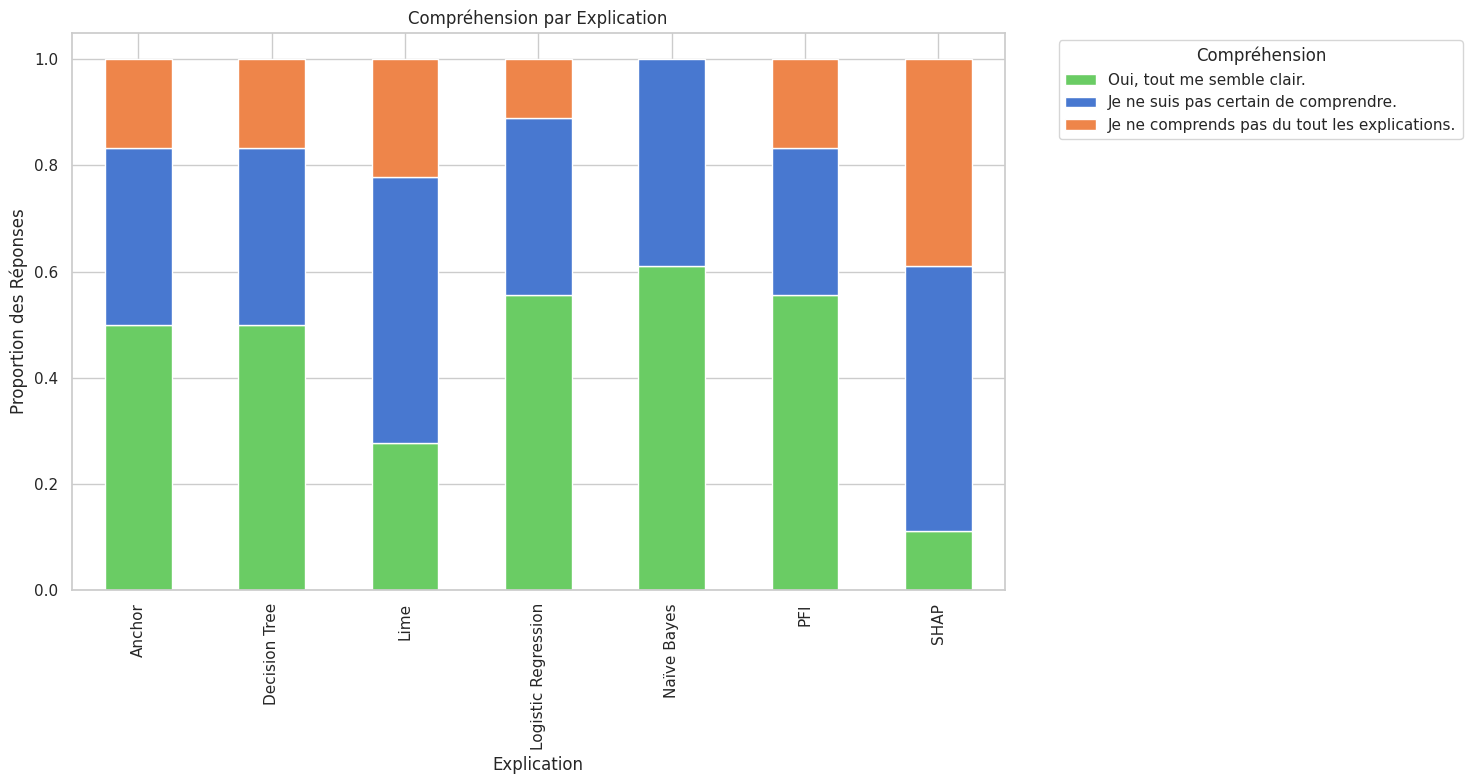

In [19]:
import pandas as pd
import matplotlib.pyplot as plt



df['Niveau de formation regroupé'] = df['Quel est votre dernier niveau de formation ou actuel ?   '].replace({
    'Bac générale': 'Bac',
    'Bac Pro': 'Bac',
    'BTS (ou équivalent Bac+2)': 'BTS et Licence',
    'Licence (ou équivalent Bac+3)': 'BTS et Licence',
    'Master / Ingénieur (ou équivalent Bac + 5)': 'Master et > Bac + 5',
    '> Bac + 5': 'Master et > Bac + 5'
})

comprehension_columns = [
    'Explication 1 : Comprenez vous les explications fournies ?',
    'Explication 2 : Comprenez vous les explications fournies ?',
    'Explication 3 : Comprenez vous les explications fournies ?',
    'Explication 4 : Comprenez vous les explications fournies ?',
    'Explication 5 : Comprenez vous les explications fournies ?',
    'Explication 6 : Comprenez vous les explications fournies ?',
    'Explication 7 : Comprenez vous les explications fournies ?'
]

new_labels_comprehension = {
    'Explication 1 : Comprenez vous les explications fournies ?': 'Lime',
    'Explication 2 : Comprenez vous les explications fournies ?': 'Anchor',
    'Explication 3 : Comprenez vous les explications fournies ?': 'SHAP',
    'Explication 4 : Comprenez vous les explications fournies ?': 'Decision Tree',
    'Explication 5 : Comprenez vous les explications fournies ?': 'Naïve Bayes',
    'Explication 6 : Comprenez vous les explications fournies ?': 'Logistic Regression',
    'Explication 7 : Comprenez vous les explications fournies ?': 'PFI'
}



df_melted = df.melt(
    id_vars=['Niveau de formation regroupé'],
    value_vars=comprehension_columns,
    var_name='Explication',
    value_name='Compréhension'
)

df_melted['Explication'] = df_melted['Explication'].replace(new_labels_comprehension)

comprehension_by_explanation = df_melted.groupby(['Explication', 'Compréhension']).size().unstack().fillna(0)

comprehension_by_explanation = comprehension_by_explanation.div(comprehension_by_explanation.sum(axis=1), axis=0)

comprehension_by_explanation = comprehension_by_explanation[['Oui, tout me semble clair.', 'Je ne suis pas certain de comprendre.', 'Je ne comprends pas du tout les explications.']]

color_mapping_comprehension = {
    'Je ne comprends pas du tout les explications.': colors_palette[1],
    'Je ne suis pas certain de comprendre.': colors_palette[0],
    'Oui, tout me semble clair.': colors_palette[2]
}

colors_comprehension = [color_mapping_comprehension.get(level, 'gray') for level in comprehension_by_explanation.columns]

comprehension_by_explanation.plot(kind='bar', stacked=True, figsize=(15, 8), color=colors_comprehension)
plt.title('Compréhension par Explication')
plt.xlabel('Explication')
plt.ylabel('Proportion des Réponses')
plt.legend(title='Compréhension', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [20]:
# resultats = []
# for niveau in df['Niveau de formation regroupé'].unique():
#   for explication in new_labels.values():
#     df_niveau_explication = df_melted[(df_melted['Niveau de formation regroupé'] == niveau) & (df_melted['Explication'] == explication)]
#     comprehension_score = df_niveau_explication['Compréhension'].replace({'Je ne comprends pas du tout les explications.': 0, 'Je ne suis pas certain de comprendre.': 0.5, 'Oui, tout me semble clair.': 1}).mean()
#     confiance_score = df_niveau_explication['Confiance'].replace({'Pas du tout confiant': 0, 'Pas très confiant': 0.5, 'Assez confiant': 1}).mean()
#     accord_score = df_niveau_explication['Accord'].replace({'Pas du tout d\'accord': 0, 'Pas très d\'accord': 0.5, 'Assez d\'accord': 1}).mean()
#     resultats.append([niveau, explication, comprehension_score, confiance_score, accord_score])

# df_resultats = pd.DataFrame(resultats, columns=['Niveau de formation', 'Explication', 'Compréhension', 'Confiance', 'Accord'])

# plt.figure(figsize=(15, 8))
# for niveau in df_resultats['Niveau de formation'].unique():
#   df_niveau = df_resultats[df_resultats['Niveau de formation'] == niveau]
#   plt.plot(df_niveau['Explication'], df_niveau['Compréhension'], label=f'{niveau} - Compréhension')
#   plt.plot(df_niveau['Explication'], df_niveau['Confiance'], label=f'{niveau} - Confiance')
#   plt.plot(df_niveau['Explication'], df_niveau['Accord'], label=f'{niveau} - Accord')

# plt.title('Comparaison des Scores de Compréhension, Confiance et Accord par Niveau de Formation')
# plt.xlabel('Explication')
# plt.ylabel('Score')
# plt.xticks(rotation=45, ha='right')
# plt.legend()
# plt.tight_layout()
# plt.show()


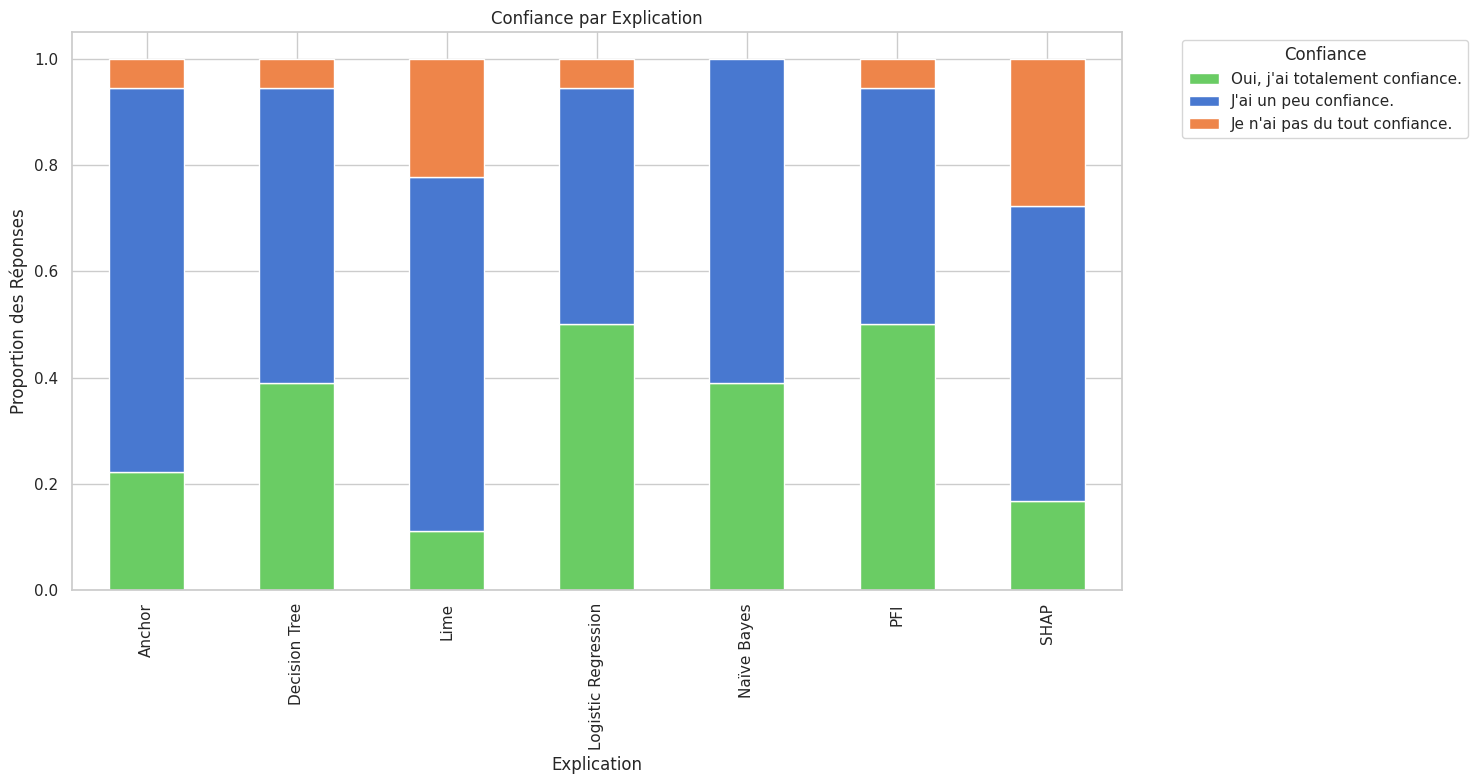

In [21]:
import pandas as pd
import matplotlib.pyplot as plt


df['Niveau de formation regroupé'] = df['Quel est votre dernier niveau de formation ou actuel ?   '].replace({
    'Bac générale': 'Bac',
    'Bac Pro': 'Bac',
    'BTS (ou équivalent Bac+2)': 'BTS et Licence',
    'Licence (ou équivalent Bac+3)': 'BTS et Licence',
    'Master / Ingénieur (ou équivalent Bac + 5)': 'Master et > Bac + 5',
    '> Bac + 5': 'Master et > Bac + 5'
})

confidence_columns = [
    'Explication 1 : Avez vous confiance dans les explication fournies ?',
    'Explication 2 : Avez vous confiance dans les explication fournies ?',
    'Explication 3 : Avez vous confiance dans les explications fournies ?',
    'Explication 4 : Avez vous confiance dans les explication fournis ?',
    'Explication 5 : Avez vous confiance dans les explications fournies ?',
    'Explication 6 : Avez vous confiance dans les explications fournies ?',
    'Explication 7 : Avez vous confiance dans les explications fournies ?'
]

new_labels_confidence = {
    'Explication 1 : Avez vous confiance dans les explication fournies ?': 'Lime',
    'Explication 2 : Avez vous confiance dans les explication fournies ?': 'Anchor',
    'Explication 3 : Avez vous confiance dans les explications fournies ?': 'SHAP',
    'Explication 4 : Avez vous confiance dans les explication fournis ?': 'Decision Tree',
    'Explication 5 : Avez vous confiance dans les explications fournies ?': 'Naïve Bayes',
    'Explication 6 : Avez vous confiance dans les explications fournies ?': 'Logistic Regression',
    'Explication 7 : Avez vous confiance dans les explications fournies ?': 'PFI'
}

df_melted_confidence = df.melt(
    id_vars=['Niveau de formation regroupé'],
    value_vars=confidence_columns,
    var_name='Explication',
    value_name='Confiance'
)

df_melted_confidence['Explication'] = df_melted_confidence['Explication'].replace(new_labels_confidence)

confidence_by_explanation = df_melted_confidence.groupby(['Explication', 'Confiance']).size().unstack().fillna(0)

confidence_by_explanation = confidence_by_explanation.div(confidence_by_explanation.sum(axis=1), axis=0)

confidence_by_explanation = confidence_by_explanation[['Oui, j\'ai totalement confiance.', 'J\'ai un peu confiance.', 'Je n\'ai pas du tout confiance.']]

color_mapping_confidence = {
    'Je n\'ai pas du tout confiance.': colors_palette[1],
    'J\'ai un peu confiance.': colors_palette[0],
    'Oui, j\'ai totalement confiance.': colors_palette[2]
}

colors_confidence = [color_mapping_confidence.get(level, 'gray') for level in confidence_by_explanation.columns]

confidence_by_explanation.plot(kind='bar', stacked=True, figsize=(15, 8), color=colors_confidence)

plt.title('Confiance par Explication')
plt.xlabel('Explication')
plt.ylabel('Proportion des Réponses')
plt.legend(title='Confiance', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Compréhension Means:
 Explication
Anchor                 0.500000
Decision Tree          0.500000
Lime                   0.277778
Logistic Regression    0.555556
Naïve Bayes            0.611111
PFI                    0.555556
SHAP                   0.111111
Name: Compréhension, dtype: float64
Accord Means:
 Explication
Anchor                 0.166667
Decision Tree          0.333333
Lime                   0.111111
Logistic Regression    0.388889
Naïve Bayes            0.444444
PFI                    0.333333
SHAP                   0.166667
Name: Accord, dtype: float64
Mean DataFrame:
                      Compréhension    Accord
Explication                                 
Anchor                    0.500000  0.166667
Decision Tree             0.500000  0.333333
Lime                      0.277778  0.111111
Logistic Regression       0.555556  0.388889
Naïve Bayes               0.611111  0.444444
PFI                       0.555556  0.333333
SHAP                      0.111111  0.166667


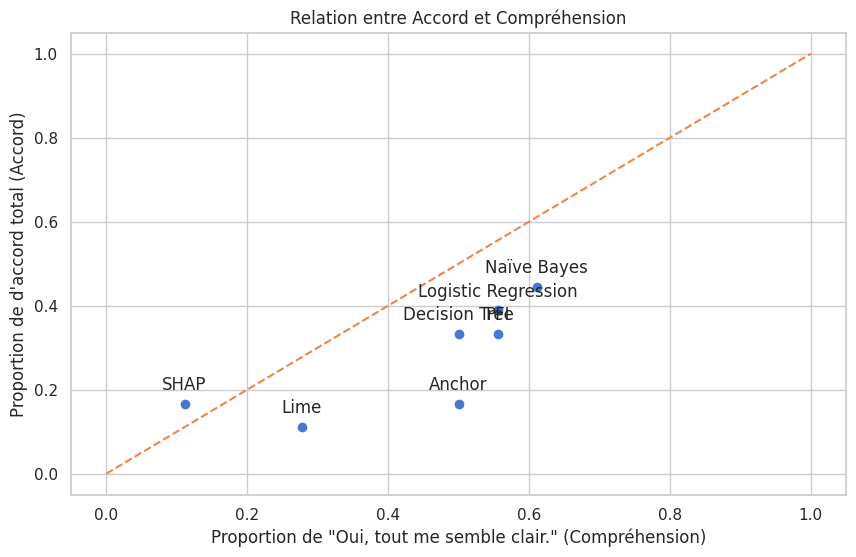

Coefficient de corrélation de Pearson: 0.7733980419227865


In [22]:
import pandas as pd
import matplotlib.pyplot as plt

agreement_columns = [
    'Explication 1 : Seriez vous à l\'aise avec la décision qui concerne Océane mais aussi celle qui concerne Pierre ?',
    'Explication 2 : Seriez vous à l\'aise avec la décision qui concerne Océane mais aussi celle qui concerne Pierre ?',
    'Explication 3 : Seriez vous à l\'aise avec la décision qui concerne Océane mais aussi celle qui concerne Pierre ?',
    'Explication 4 : Seriez vous à l\'aise si un étudiant était catégorisé E+P+ à l\'aide des explications fournies ? E-P- ?',
    'Explication 5 : Seriez vous à l\'aise si un étudiant était catégorisé E+P+ à l\'aide des explications fournies ? E-P- ?',
    'Explication 6 : Seriez vous à l\'aise si un étudiant était catégorisé E+P+ à l\'aide des explications fournies ? E-P- ?',
    'Explication 7 : Seriez vous à l\'aise si un étudiant était catégorisé E+P+ à l\'aide des explications fournies ? E-P- ?'
]

new_agreement_columns = {
    'Explication 1 : Seriez vous à l\'aise avec la décision qui concerne Océane mais aussi celle qui concerne Pierre ?': 'Lime',
    'Explication 2 : Seriez vous à l\'aise avec la décision qui concerne Océane mais aussi celle qui concerne Pierre ?': 'Anchor',
    'Explication 3 : Seriez vous à l\'aise avec la décision qui concerne Océane mais aussi celle qui concerne Pierre ?': 'SHAP',
    'Explication 4 : Seriez vous à l\'aise si un étudiant était catégorisé E+P+ à l\'aide des explications fournies ? E-P- ?': 'Decision Tree',
    'Explication 5 : Seriez vous à l\'aise si un étudiant était catégorisé E+P+ à l\'aide des explications fournies ? E-P- ?': 'Naïve Bayes',
    'Explication 6 : Seriez vous à l\'aise si un étudiant était catégorisé E+P+ à l\'aide des explications fournies ? E-P- ?': 'Logistic Regression',
    'Explication 7 : Seriez vous à l\'aise si un étudiant était catégorisé E+P+ à l\'aide des explications fournies ? E-P- ?': 'PFI'
}


df_melted_accord = df.melt(
    id_vars=['Niveau de formation regroupé'],
    value_vars=agreement_columns,
    var_name='Explication',
    value_name='Accord'

)

df_melted_accord['Explication'] = df_melted_accord['Explication'].replace(new_agreement_columns)


comprehension_means = df_melted.groupby('Explication')['Compréhension'].apply(lambda x: (x == 'Oui, tout me semble clair.').mean())
accord_means = df_melted_accord.groupby('Explication')['Accord'].apply(lambda x: (
    (x == 'Je serais à l\'aise pour les deux décisions.').mean() +
    (x == 'Oui je serais à l\'aise dans les deux cas.').mean()
))

print("Compréhension Means:\n", comprehension_means)
print("Accord Means:\n", accord_means)

mean_df = pd.DataFrame({
    'Compréhension': comprehension_means,
    'Accord': accord_means
})

print("Mean DataFrame:\n", mean_df)

plt.figure(figsize=(10, 6))
plt.scatter(mean_df['Compréhension'], mean_df['Accord'], color=colors_palette[0])
plt.plot([0, 1], [0, 1], ls='--', color=colors_palette[1])
plt.xlabel('Proportion de "Oui, tout me semble clair." (Compréhension)')
plt.ylabel('Proportion de d\'accord total (Accord)')
plt.title('Relation entre Accord et Compréhension')

for i, row in mean_df.iterrows():
    plt.annotate(i, (row['Compréhension'], row['Accord']), textcoords="offset points", xytext=(0,10), ha='center')

plt.grid(True)
plt.show()

correlation = mean_df['Compréhension'].corr(mean_df['Accord'])
print(f"Coefficient de corrélation de Pearson: {correlation}")


Confidence Means:
 Explication
Anchor                 0.222222
Decision Tree          0.388889
Lime                   0.111111
Logistic Regression    0.500000
Naïve Bayes            0.388889
PFI                    0.500000
SHAP                   0.166667
Name: Confiance, dtype: float64
Accord Means:
 Explication
Anchor                 0.166667
Decision Tree          0.333333
Lime                   0.111111
Logistic Regression    0.388889
Naïve Bayes            0.444444
PFI                    0.333333
SHAP                   0.166667
Name: Accord, dtype: float64
Mean DataFrame:
                      Confiance    Accord
Explication                             
Anchor                0.222222  0.166667
Decision Tree         0.388889  0.333333
Lime                  0.111111  0.111111
Logistic Regression   0.500000  0.388889
Naïve Bayes           0.388889  0.444444
PFI                   0.500000  0.333333
SHAP                  0.166667  0.166667


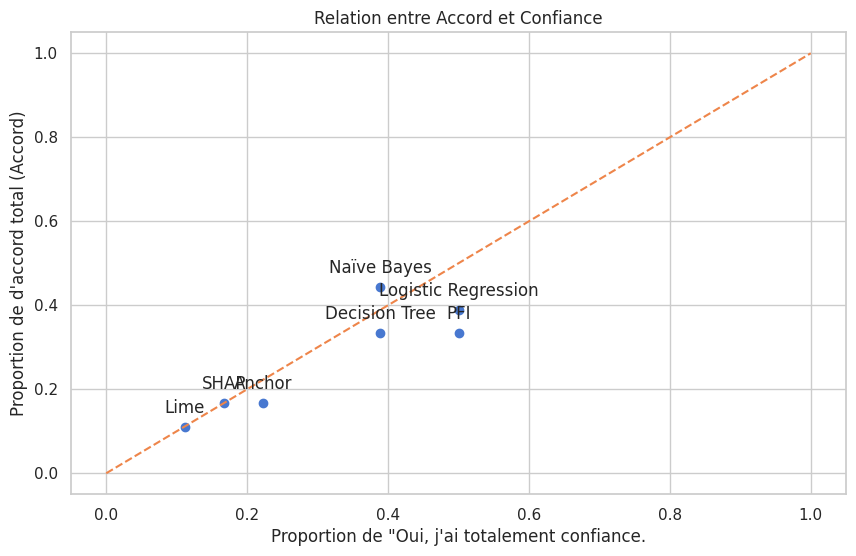

Coefficient de corrélation de Pearson: 0.8851747605558726


In [23]:
import pandas as pd
import matplotlib.pyplot as plt

agreement_columns = [
    'Explication 1 : Seriez vous à l\'aise avec la décision qui concerne Océane mais aussi celle qui concerne Pierre ?',
    'Explication 2 : Seriez vous à l\'aise avec la décision qui concerne Océane mais aussi celle qui concerne Pierre ?',
    'Explication 3 : Seriez vous à l\'aise avec la décision qui concerne Océane mais aussi celle qui concerne Pierre ?',
    'Explication 4 : Seriez vous à l\'aise si un étudiant était catégorisé E+P+ à l\'aide des explications fournies ? E-P- ?',
    'Explication 5 : Seriez vous à l\'aise si un étudiant était catégorisé E+P+ à l\'aide des explications fournies ? E-P- ?',
    'Explication 6 : Seriez vous à l\'aise si un étudiant était catégorisé E+P+ à l\'aide des explications fournies ? E-P- ?',
    'Explication 7 : Seriez vous à l\'aise si un étudiant était catégorisé E+P+ à l\'aide des explications fournies ? E-P- ?'
]

new_agreement_columns = {
    'Explication 1 : Seriez vous à l\'aise avec la décision qui concerne Océane mais aussi celle qui concerne Pierre ?': 'Lime',
    'Explication 2 : Seriez vous à l\'aise avec la décision qui concerne Océane mais aussi celle qui concerne Pierre ?': 'Anchor',
    'Explication 3 : Seriez vous à l\'aise avec la décision qui concerne Océane mais aussi celle qui concerne Pierre ?': 'SHAP',
    'Explication 4 : Seriez vous à l\'aise si un étudiant était catégorisé E+P+ à l\'aide des explications fournies ? E-P- ?': 'Decision Tree',
    'Explication 5 : Seriez vous à l\'aise si un étudiant était catégorisé E+P+ à l\'aide des explications fournies ? E-P- ?': 'Naïve Bayes',
    'Explication 6 : Seriez vous à l\'aise si un étudiant était catégorisé E+P+ à l\'aide des explications fournies ? E-P- ?': 'Logistic Regression',
    'Explication 7 : Seriez vous à l\'aise si un étudiant était catégorisé E+P+ à l\'aide des explications fournies ? E-P- ?': 'PFI'
}


df_melted_accord = df.melt(
    id_vars=['Niveau de formation regroupé'],
    value_vars=agreement_columns,
    var_name='Explication',
    value_name='Accord'

)

df_melted_accord['Explication'] = df_melted_accord['Explication'].replace(new_agreement_columns)


confidence_means = df_melted_confidence.groupby('Explication')['Confiance'].apply(lambda x: (x == 'Oui, j\'ai totalement confiance.').mean())
accord_means = df_melted_accord.groupby('Explication')['Accord'].apply(lambda x: (
    (x == 'Je serais à l\'aise pour les deux décisions.').mean() +
    (x == 'Oui je serais à l\'aise dans les deux cas.').mean()
))

print("Confidence Means:\n", confidence_means)
print("Accord Means:\n", accord_means)

mean_df = pd.DataFrame({
    'Confiance': confidence_means,
    'Accord': accord_means
})

print("Mean DataFrame:\n", mean_df)

plt.figure(figsize=(10, 6))
plt.scatter(mean_df['Confiance'], mean_df['Accord'], color=colors_palette[0])
plt.plot([0, 1], [0, 1], ls='--', color=colors_palette[1])
plt.xlabel('Proportion de "Oui, j\'ai totalement confiance.')
plt.ylabel('Proportion de d\'accord total (Accord)')
plt.title('Relation entre Accord et Confiance')

for i, row in mean_df.iterrows():
    plt.annotate(i, (row['Confiance'], row['Accord']), textcoords="offset points", xytext=(0,10), ha='center')

plt.grid(True)
plt.show()

correlation = mean_df['Confiance'].corr(mean_df['Accord'])
print(f"Coefficient de corrélation de Pearson: {correlation}")


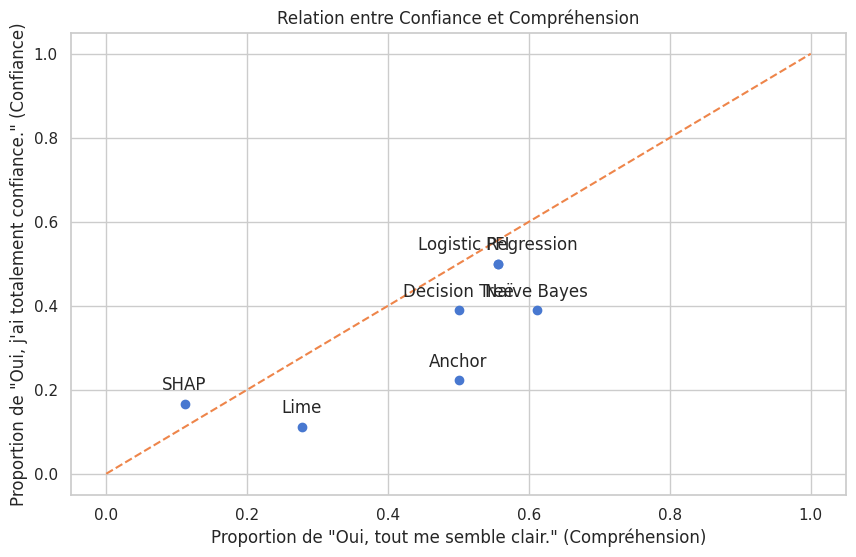

Coefficient de corrélation de Pearson: 0.7868621523390394


In [24]:
import pandas as pd
import matplotlib.pyplot as plt

comprehension_means = df_melted.groupby('Explication')['Compréhension'].apply(lambda x: (x == 'Oui, tout me semble clair.').mean())
confidence_means = df_melted_confidence.groupby('Explication')['Confiance'].apply(lambda x: (x == 'Oui, j\'ai totalement confiance.').mean())

mean_df = pd.DataFrame({
    'Compréhension': comprehension_means,
    'Confiance': confidence_means
})

plt.figure(figsize=(10, 6))
plt.scatter(mean_df['Compréhension'], mean_df['Confiance'],color=colors_palette[0])
plt.plot([0, 1], [0, 1], ls='--', color=colors_palette[1])
plt.xlabel('Proportion de "Oui, tout me semble clair." (Compréhension)')
plt.ylabel('Proportion de "Oui, j\'ai totalement confiance." (Confiance)')
plt.title('Relation entre Confiance et Compréhension')

for i, row in mean_df.iterrows():
    plt.annotate(i, (row['Compréhension'], row['Confiance']), textcoords="offset points", xytext=(0,10), ha='center')

plt.grid(True)
plt.show()

correlation = mean_df['Compréhension'].corr(mean_df['Confiance'])
print(f"Coefficient de corrélation de Pearson: {correlation}")


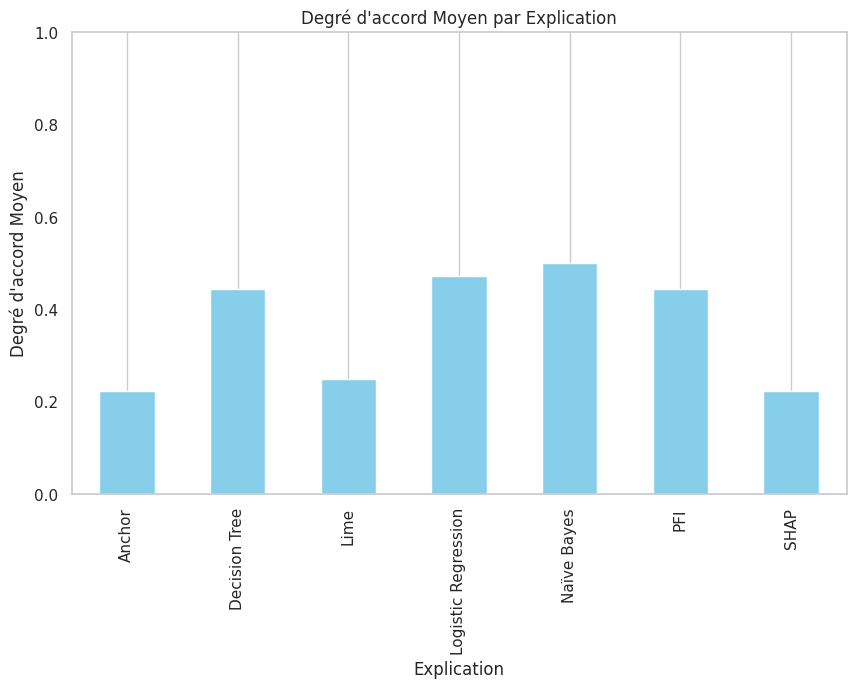

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

aise_columns = [
    'Explication 1 : Seriez vous à l\'aise avec la décision qui concerne Océane mais aussi celle qui concerne Pierre ?',
    'Explication 2 : Seriez vous à l\'aise avec la décision qui concerne Océane mais aussi celle qui concerne Pierre ?',
    'Explication 3 : Seriez vous à l\'aise avec la décision qui concerne Océane mais aussi celle qui concerne Pierre ?',
    'Explication 4 : Seriez vous à l\'aise si un étudiant était catégorisé E+P+ à l\'aide des explications fournies ? E-P- ?',
    'Explication 5 : Seriez vous à l\'aise si un étudiant était catégorisé E+P+ à l\'aide des explications fournies ? E-P- ?',
    'Explication 6 : Seriez vous à l\'aise si un étudiant était catégorisé E+P+ à l\'aide des explications fournies ? E-P- ?',
    'Explication 7 : Seriez vous à l\'aise si un étudiant était catégorisé E+P+ à l\'aide des explications fournies ? E-P- ?'
]

new_labels_aise = {
    'Explication 1 : Seriez vous à l\'aise avec la décision qui concerne Océane mais aussi celle qui concerne Pierre ?': 'Lime',
    'Explication 2 : Seriez vous à l\'aise avec la décision qui concerne Océane mais aussi celle qui concerne Pierre ?': 'Anchor',
    'Explication 3 : Seriez vous à l\'aise avec la décision qui concerne Océane mais aussi celle qui concerne Pierre ?': 'SHAP',
    'Explication 4 : Seriez vous à l\'aise si un étudiant était catégorisé E+P+ à l\'aide des explications fournies ? E-P- ?': 'Decision Tree',
    'Explication 5 : Seriez vous à l\'aise si un étudiant était catégorisé E+P+ à l\'aide des explications fournies ? E-P- ?': 'Naïve Bayes',
    'Explication 6 : Seriez vous à l\'aise si un étudiant était catégorisé E+P+ à l\'aide des explications fournies ? E-P- ?': 'Logistic Regression',
    'Explication 7 : Seriez vous à l\'aise si un étudiant était catégorisé E+P+ à l\'aide des explications fournies ? E-P- ?': 'PFI'
}

confidence_mapping = {
    'Pas à l\'aise pour les deux décisions': 0,
    'Je ne suis à l\'aise que pour la décision de Pierre (E-P-)': 0.5,
    'Je ne suis à l\'aise que pour la décision d\'Océane (E+P+)': 0.5,
    'Je serais à l\'aise pour les deux décisions': 1,
    'Que ce soit pour Océane ou pour Pierre je ne suis pas à l\'aise avec la décision.': 0,
    'Je ne serais pas à l\'aise dans les deux situations.': 0,
    'Je serais à l\'aise que dans le cas E+P+.': 0.5,
    'Oui je serais à l\'aise dans les deux cas.': 1,
    'Je serais à l\'aise pour les deux décisions.':1,
    'Je ne suis à l\'aise que pour la décision d\'Océane (E-P-)':0.5
}

df_melted_aise = df.melt(
    id_vars=['Niveau de formation regroupé'],
    value_vars=aise_columns,
    var_name='Explication',
    value_name='Aise'
)

df_melted_aise['Explication'] = df_melted_aise['Explication'].replace(new_labels_aise)

df_melted_aise['Confiance'] = df_melted_aise['Aise'].map(confidence_mapping)

non_mapped_values = df_melted_aise[df_melted_aise['Confiance'].isnull()]['Aise'].unique()
if len(non_mapped_values) > 0:
    print(f"Valeurs non mappées: {non_mapped_values}")

df_melted_aise = df_melted_aise.dropna(subset=['Confiance'])

mean_confidence = df_melted_aise.groupby('Explication')['Confiance'].mean()

mean_confidence.plot(kind='bar', figsize=(10, 6), color='skyblue')

plt.title('Degré d\'accord Moyen par Explication')
plt.xlabel('Explication')
plt.ylabel('Degré d\'accord Moyen')
plt.ylim(0, 1)
plt.grid(axis='y')

plt.show()


In [26]:
comprehension_means = df_melted.groupby('Explication')['Compréhension'].apply(lambda x: (x == 'Oui, tout me semble clair.').mean())
confidence_means = df_melted_confidence.groupby('Explication')['Confiance'].apply(lambda x: (x == 'Oui, j\'ai totalement confiance.').mean())
aise_means = df_melted_aise.groupby('Explication')['Confiance'].mean()
mean_df = pd.DataFrame({
    'Compréhension': comprehension_means,
    'Confiance': confidence_means,
    'Accord': aise_means
})

import plotly.graph_objects as go

categories = mean_df.index
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=mean_df['Compréhension'],
      theta=categories,
      fill='toself',
      name='Compréhension'
))
fig.add_trace(go.Scatterpolar(
      r=mean_df['Confiance'],
      theta=categories,
      fill='toself',
      name='Confiance'
))
fig.add_trace(go.Scatterpolar(
      r=mean_df['Accord'],
      theta=categories,
      fill='toself',
      name='Accord'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=True
)

fig.show()


In [27]:
grouped = df_melted.groupby(['Explication', 'Niveau de formation regroupé'])['Compréhension'].apply(lambda x: (x == 'Oui, tout me semble clair.').mean()).reset_index(name='Compréhension')
grouped_confidence = df_melted_confidence.groupby(['Explication', 'Niveau de formation regroupé'])['Confiance'].apply(lambda x: (x == 'Oui, j\'ai totalement confiance.').mean()).reset_index(name='Confiance')
grouped_aise = df_melted_aise.groupby(['Explication', 'Niveau de formation regroupé'])['Confiance'].mean().reset_index(name='Accord')

result = pd.merge(grouped, grouped_confidence, on=['Explication', 'Niveau de formation regroupé'])
result = pd.merge(result, grouped_aise, on=['Explication', 'Niveau de formation regroupé'])

print(result)


            Explication Niveau de formation regroupé  Compréhension  \
0                Anchor               BTS et Licence       0.500000   
1                Anchor                          Bac       0.000000   
2                Anchor          Master et > Bac + 5       0.583333   
3         Decision Tree               BTS et Licence       0.500000   
4         Decision Tree                          Bac       0.000000   
5         Decision Tree          Master et > Bac + 5       0.583333   
6                  Lime               BTS et Licence       0.250000   
7                  Lime                          Bac       0.000000   
8                  Lime          Master et > Bac + 5       0.333333   
9   Logistic Regression               BTS et Licence       0.500000   
10  Logistic Regression                          Bac       0.000000   
11  Logistic Regression          Master et > Bac + 5       0.666667   
12          Naïve Bayes               BTS et Licence       0.500000   
13    

In [28]:

import plotly.graph_objects as go

for niveau in result['Niveau de formation regroupé'].unique():
  filtered_result = result[result['Niveau de formation regroupé'] == niveau]

  categories = filtered_result['Explication']
  fig = go.Figure()

  fig.add_trace(go.Scatterpolar(
      r=filtered_result['Compréhension'],
      theta=categories,
      fill='toself',
      name='Compréhension'
  ))
  fig.add_trace(go.Scatterpolar(
      r=filtered_result['Confiance'],
      theta=categories,
      fill='toself',
      name='Confiance'
  ))
  fig.add_trace(go.Scatterpolar(
      r=filtered_result['Accord'],
      theta=categories,
      fill='toself',
      name='Accord'
  ))

  fig.update_layout(
    title=f"Radar Chart - {niveau}",
    polar=dict(
      radialaxis=dict(
        visible=True,
        range=[0, 1]
      )),
    showlegend=True
  )

  fig.show()


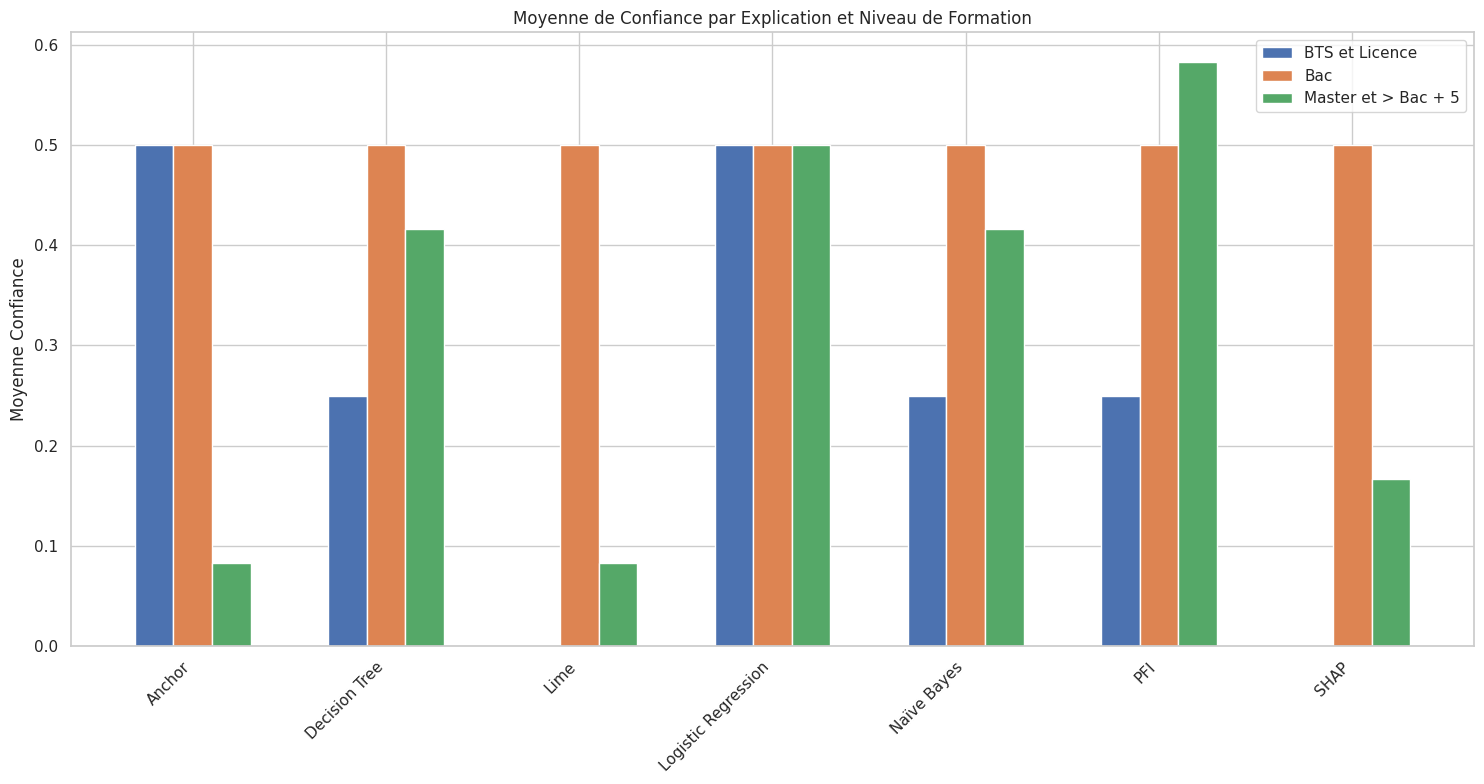

In [29]:
confidence_by_level = df_melted_confidence.groupby(['Niveau de formation regroupé', 'Explication'])['Confiance'].apply(lambda x: (x == 'Oui, j\'ai totalement confiance.').mean()).reset_index(name='Moyenne Confiance')

fig, ax = plt.subplots(figsize=(15, 8))

width = 0.2
x = range(len(confidence_by_level['Explication'].unique()))
for i, niveau in enumerate(confidence_by_level['Niveau de formation regroupé'].unique()):
  data = confidence_by_level[confidence_by_level['Niveau de formation regroupé'] == niveau]
  ax.bar([pos + i * width for pos in x], data['Moyenne Confiance'], width=width, label=niveau)

ax.set_xticks([pos + width * (len(confidence_by_level['Niveau de formation regroupé'].unique()) - 1) / 2 for pos in x])
ax.set_xticklabels(confidence_by_level['Explication'].unique(), rotation=45, ha='right')
ax.set_ylabel('Moyenne Confiance')
ax.set_title('Moyenne de Confiance par Explication et Niveau de Formation')
ax.legend()

plt.tight_layout()
plt.show()


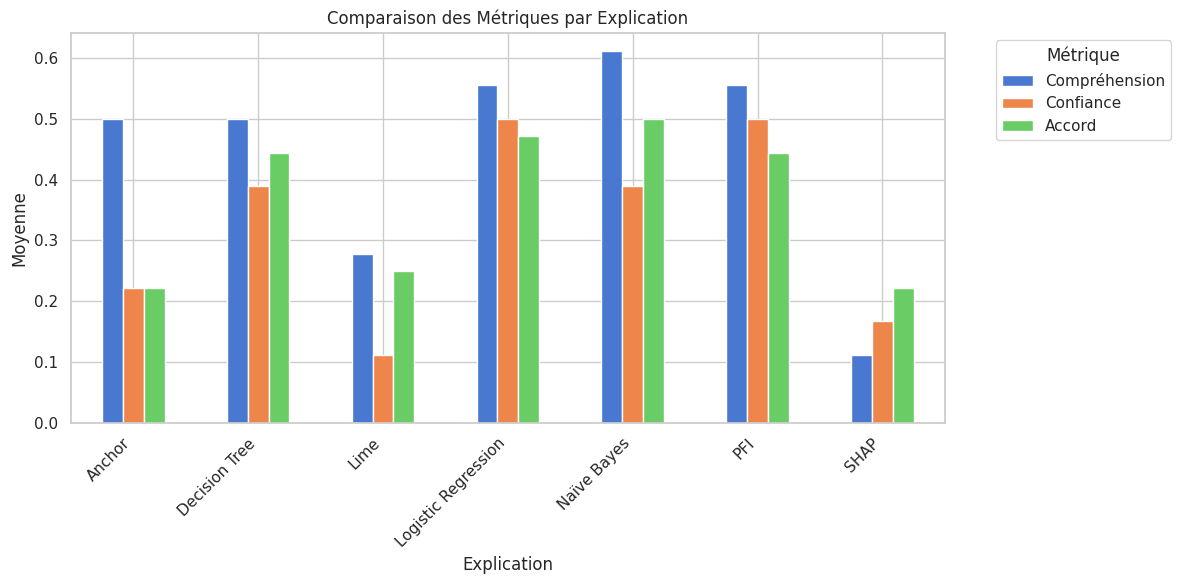

In [30]:
comprehension_means = df_melted.groupby('Explication')['Compréhension'].apply(lambda x: (x == 'Oui, tout me semble clair.').mean())
confidence_means = df_melted_confidence.groupby('Explication')['Confiance'].apply(lambda x: (x == 'Oui, j\'ai totalement confiance.').mean())
aise_means = df_melted_aise.groupby('Explication')['Confiance'].mean()

mean_df = pd.DataFrame({
    'Compréhension': comprehension_means,
    'Confiance': confidence_means,
    'Accord': aise_means
})

mean_df.plot(kind='bar', figsize=(12, 6), color=colors_palette)
plt.title('Comparaison des Métriques par Explication')
plt.xlabel('Explication')
plt.ylabel('Moyenne')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Métrique', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()


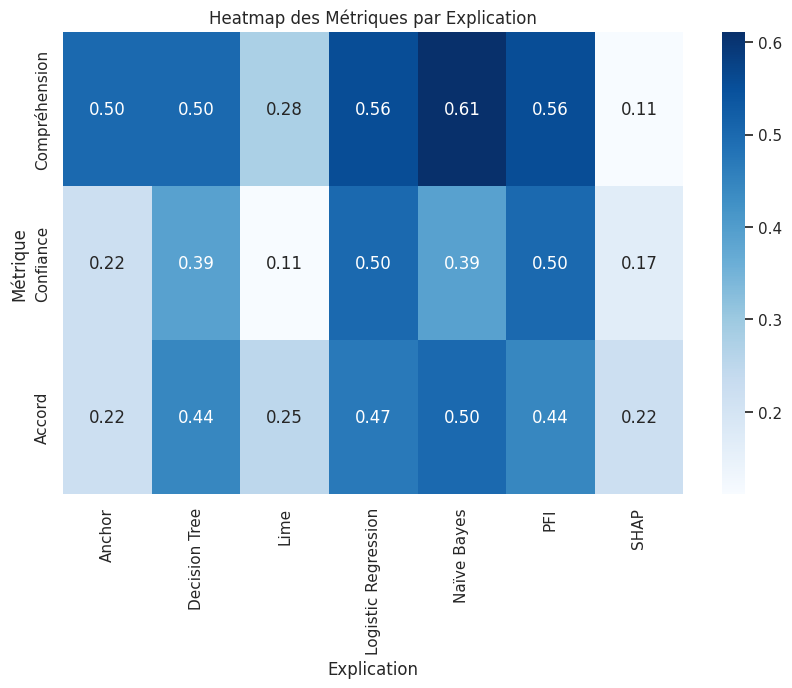

In [31]:

import seaborn as sns
import matplotlib.pyplot as plt

comprehension_means = df_melted.groupby('Explication')['Compréhension'].apply(lambda x: (x == 'Oui, tout me semble clair.').mean())
confidence_means = df_melted_confidence.groupby('Explication')['Confiance'].apply(lambda x: (x == 'Oui, j\'ai totalement confiance.').mean())
aise_means = df_melted_aise.groupby('Explication')['Confiance'].mean()

mean_df = pd.DataFrame({
    'Compréhension': comprehension_means,
    'Confiance': confidence_means,
    'Accord': aise_means
})

heatmap_df = mean_df.T

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_df, annot=True, fmt=".2f", cmap="Blues", cbar=True)
plt.title('Heatmap des Métriques par Explication')
plt.xlabel('Explication')
plt.ylabel('Métrique')
plt.show()


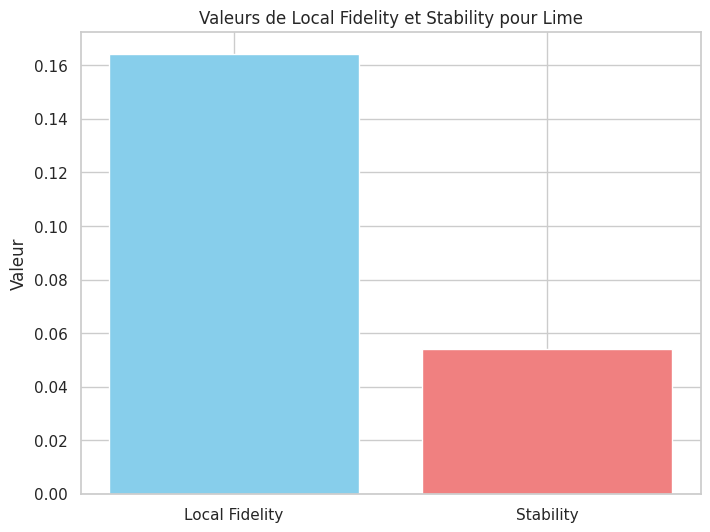

In [32]:
# Stability : 0.05422359590610972

import matplotlib.pyplot as plt

explanation = 'Lime'
local_fidelity = 0.16431707676421803
stability = 0.05422359590610972

fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(['Local Fidelity', 'Stability'], [local_fidelity, stability], color=['skyblue', 'lightcoral'])

ax.set_ylabel('Valeur')
ax.set_title(f'Valeurs de Local Fidelity et Stability pour {explanation}')

plt.show()


  Explication  Local Fidelity  Stability  Compréhension  Confiance  Accord
0        Lime        0.164317   0.054224       0.277778   0.111111    0.25


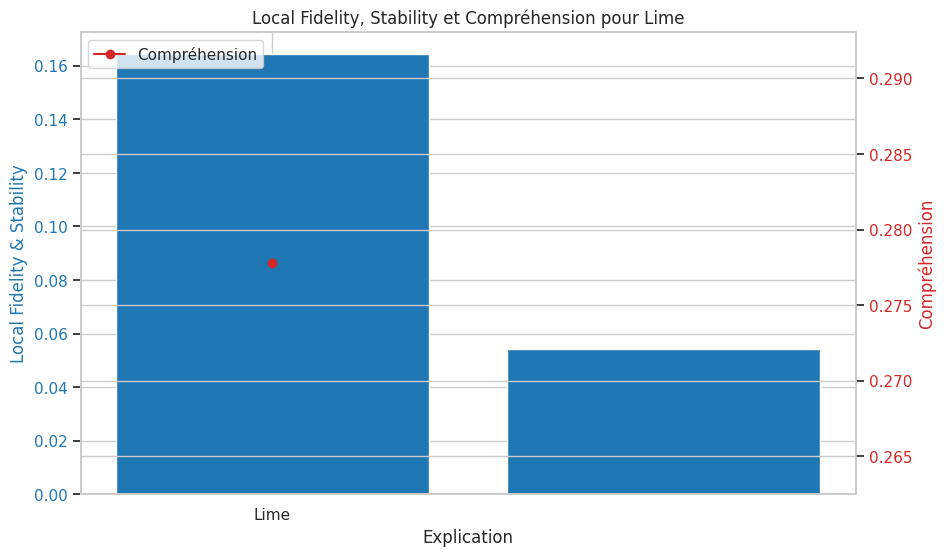

In [33]:

import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

explanation = 'Lime'
local_fidelity = 0.16431707676421803
stability = 0.05422359590610972

lime_data = pd.DataFrame({
    'Explication': [explanation],
    'Local Fidelity': [local_fidelity],
    'Stability': [stability]
})

merged_df = pd.merge(lime_data, mean_df.reset_index(), left_on='Explication', right_on='Explication', how='left')

print(merged_df)

fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Explication')
ax1.set_ylabel('Local Fidelity & Stability', color=color)
ax1.bar(['Local Fidelity', 'Stability'], [local_fidelity, stability], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Compréhension', color=color)
ax2.plot(merged_df['Explication'], merged_df['Compréhension'], marker='o', color=color, linestyle='-', label='Compréhension')
ax2.tick_params(axis='y', labelcolor=color)

plt.title(f'Local Fidelity, Stability et Compréhension pour {explanation}')

plt.legend(loc='upper left')

plt.show()


  Explication  Local Fidelity  Compréhension  Confiance  Accord
0        Lime        0.164317       0.277778   0.111111    0.25


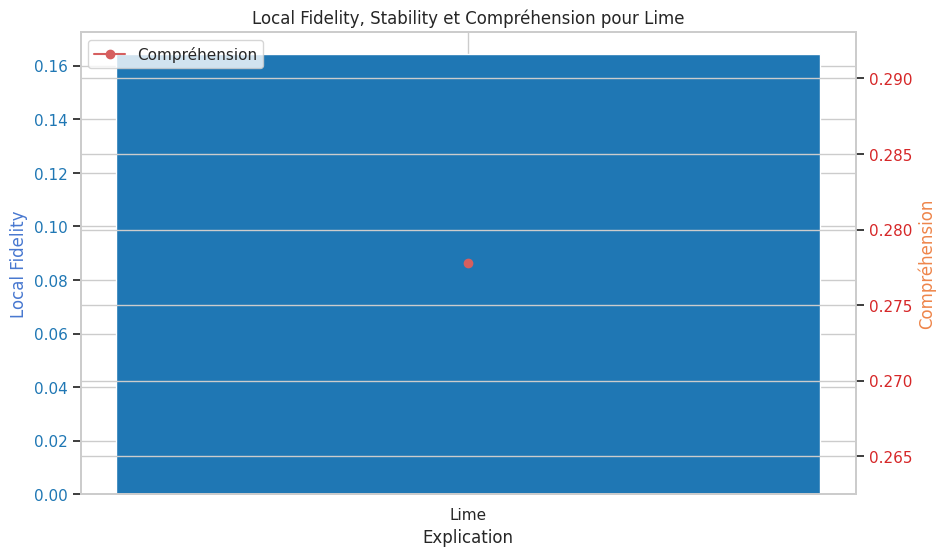

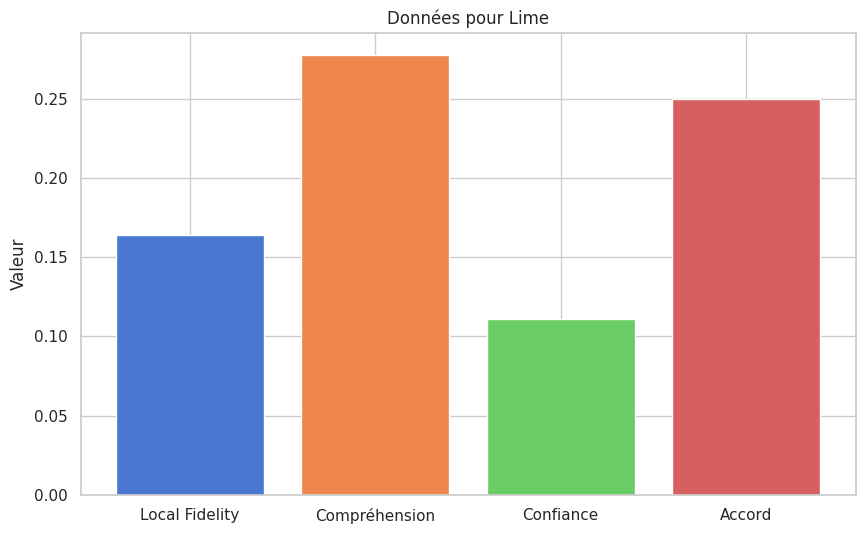

In [34]:

import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

explanation = 'Lime'
local_fidelity = 0.16431707676421803
stability = 0.05422359590610972

lime_data = pd.DataFrame({
    'Explication': [explanation],
    'Local Fidelity': [local_fidelity],
})

merged_df = pd.merge(lime_data, mean_df.reset_index(), left_on='Explication', right_on='Explication', how='left')

print(merged_df)

fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Explication')
ax1.set_ylabel('Local Fidelity', color=colors_palette[0])
ax1.bar(['Local Fidelity'], [local_fidelity], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Compréhension', color=colors_palette[1])
ax2.plot(merged_df['Explication'], merged_df['Compréhension'], marker='o', color=colors_palette[3], linestyle='-', label='Compréhension')
ax2.tick_params(axis='y', labelcolor=color)

plt.title(f'Local Fidelity, Stability et Compréhension pour {explanation}')
plt.legend(loc='upper left')
plt.show()

lime_values = merged_df.iloc[0, 1:].values
fig, ax = plt.subplots(figsize=(10, 6))
labels = ['Local Fidelity',  'Compréhension', 'Confiance', 'Accord']
ax.bar(labels, lime_values, color=colors_palette)
ax.set_ylabel('Valeur')
ax.set_title(f'Données pour {explanation}')
plt.show()


  Explication  Local Fidelity  Stability  Compréhension  Confiance  Accord
0        Lime        0.157055   0.058048       0.277778   0.111111    0.25


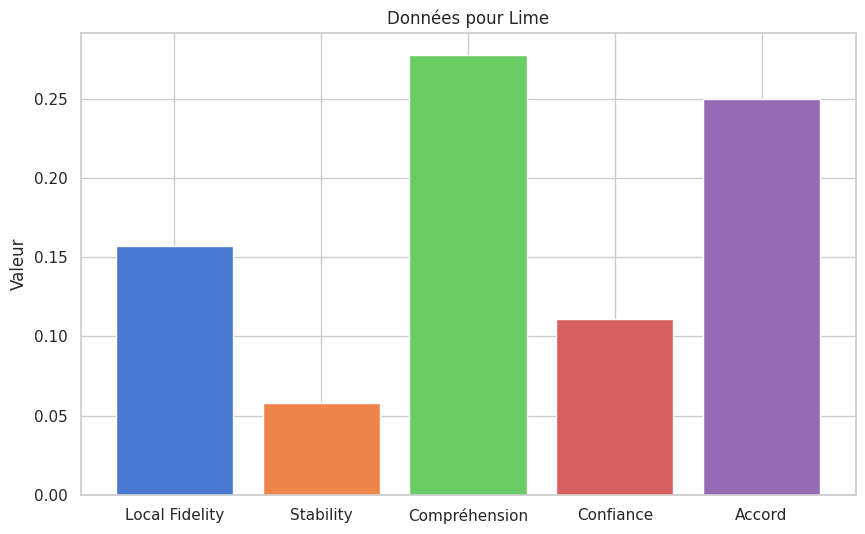

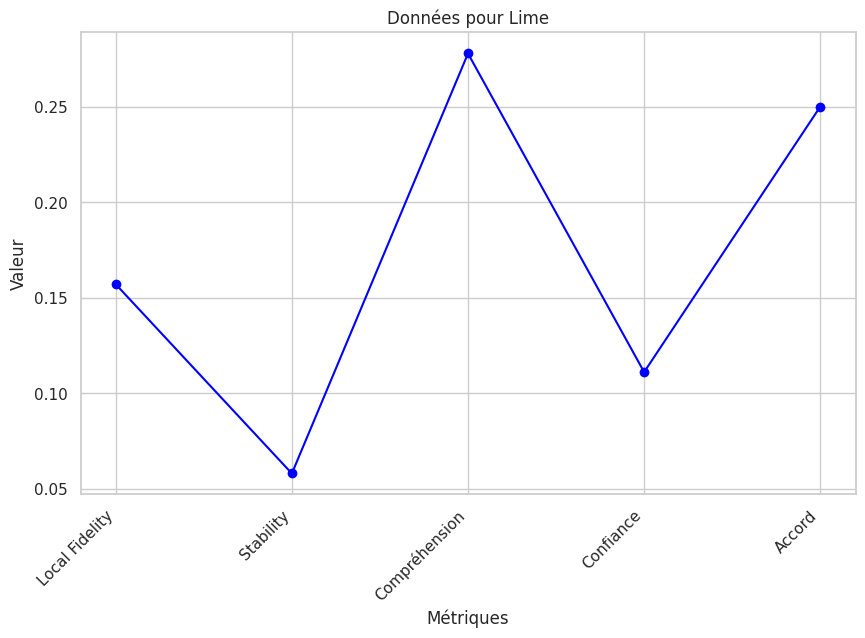

In [35]:

import pandas as pd
import matplotlib.pyplot as plt

explanation = 'Lime'
local_fidelity = 0.15705542424760216
stability = 0.05804758576216388

lime_data = pd.DataFrame({
    'Explication': [explanation],
    'Local Fidelity': [local_fidelity],
    'Stability': [stability]
})

merged_df = pd.merge(lime_data, mean_df.reset_index(), left_on='Explication', right_on='Explication', how='left')

print(merged_df)

lime_values = merged_df.iloc[0, 1:].values

fig, ax = plt.subplots(figsize=(10, 6))
labels = ['Local Fidelity', 'Stability', 'Compréhension', 'Confiance', 'Accord']
ax.bar(labels, lime_values, color=colors_palette)
ax.set_ylabel('Valeur')
ax.set_title(f'Données pour {explanation}')
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
x = labels
y = lime_values
ax.plot(x, y, marker='o', linestyle='-', color='blue')
ax.set_xlabel('Métriques')
ax.set_ylabel('Valeur')
ax.set_title(f'Données pour {explanation}')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


  Explication  Precision1  Coverage1  Precision2  Coverage2  Compréhension  \
0      Anchor         1.0       0.13         1.0       0.15            0.5   

   Confiance    Accord  
0   0.222222  0.222222  


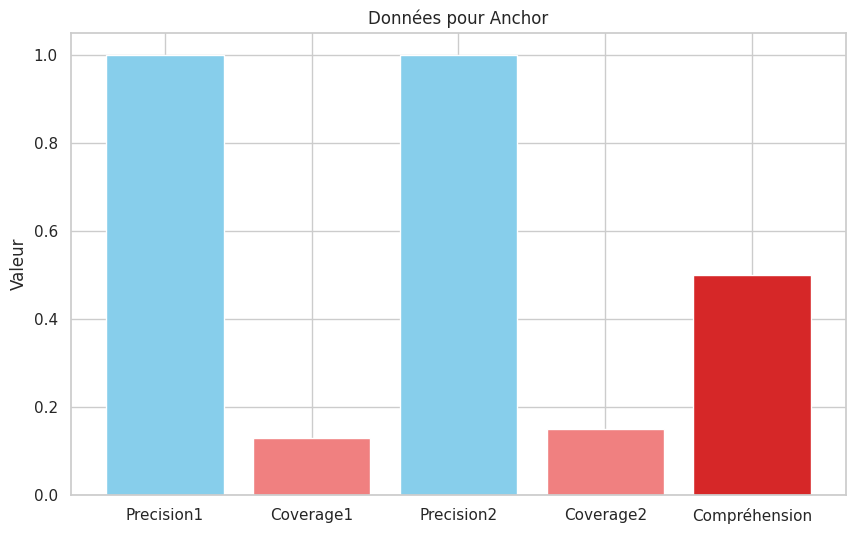

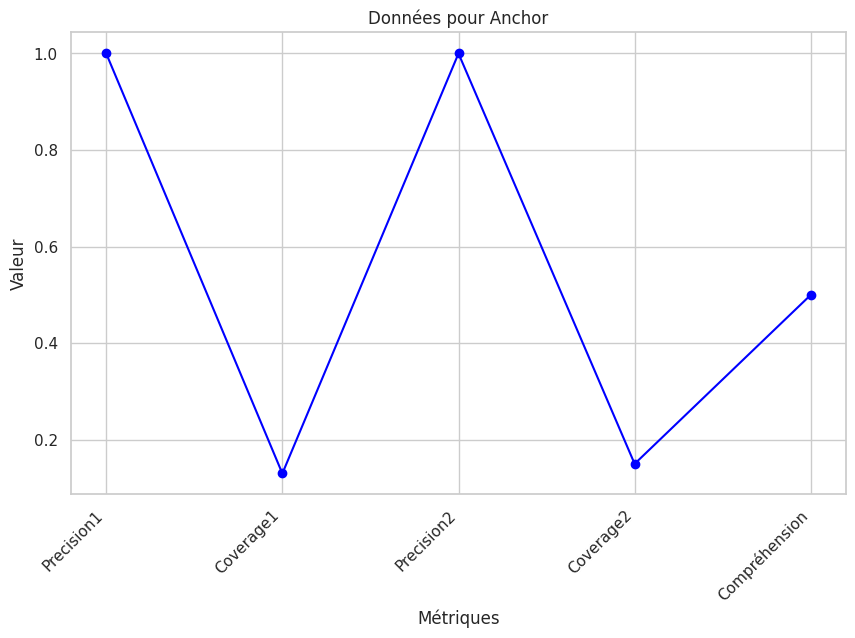

In [36]:
# Coverage1: 0.13 and Precision2: 1.00
# Coverage2: 0.15 et la confiance et la compréhension des répondants

import pandas as pd
import matplotlib.pyplot as plt

explanation = 'Anchor'
precision1 = 1.00
coverage1 = 0.13
precision2 = 1.00
coverage2 = 0.15

anchor_data = pd.DataFrame({
    'Explication': [explanation],
    'Precision1': [precision1],
    'Coverage1': [coverage1],
    'Precision2': [precision2],
    'Coverage2': [coverage2]
})

merged_df = pd.merge(anchor_data, mean_df.reset_index(), left_on='Explication', right_on='Explication', how='left')

print(merged_df)

anchor_values = merged_df.iloc[0, 1:6].values

fig, ax = plt.subplots(figsize=(10, 6))
labels = ['Precision1', 'Coverage1', 'Precision2', 'Coverage2', 'Compréhension']
ax.bar(labels, anchor_values, color=['skyblue', 'lightcoral', 'skyblue', 'lightcoral', 'tab:red'])
ax.set_ylabel('Valeur')
ax.set_title(f'Données pour {explanation}')
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
x = labels
y = anchor_values
ax.plot(x, y, marker='o', linestyle='-', color='blue')
ax.set_xlabel('Métriques')
ax.set_ylabel('Valeur')
ax.set_title(f'Données pour {explanation}')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


  Explication  Precision  Coverage  Compréhension  Confiance    Accord
0      Anchor        1.0      0.13            0.5   0.222222  0.222222


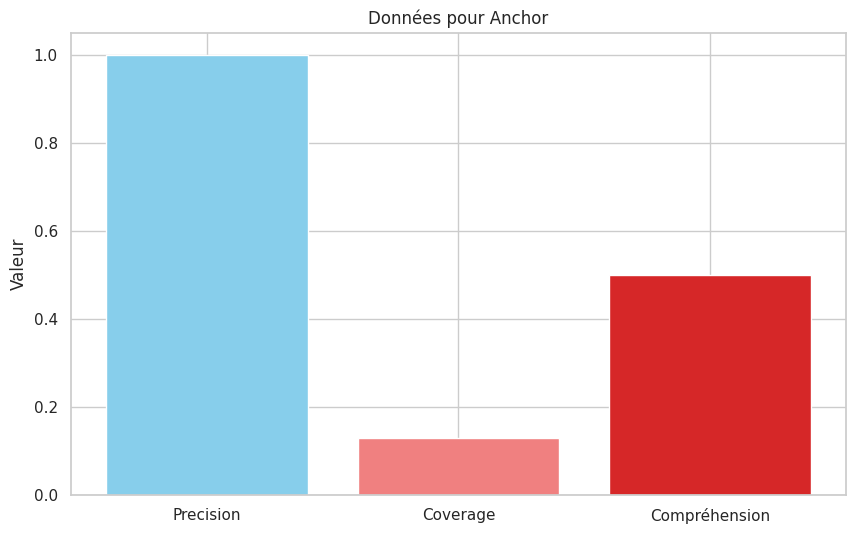

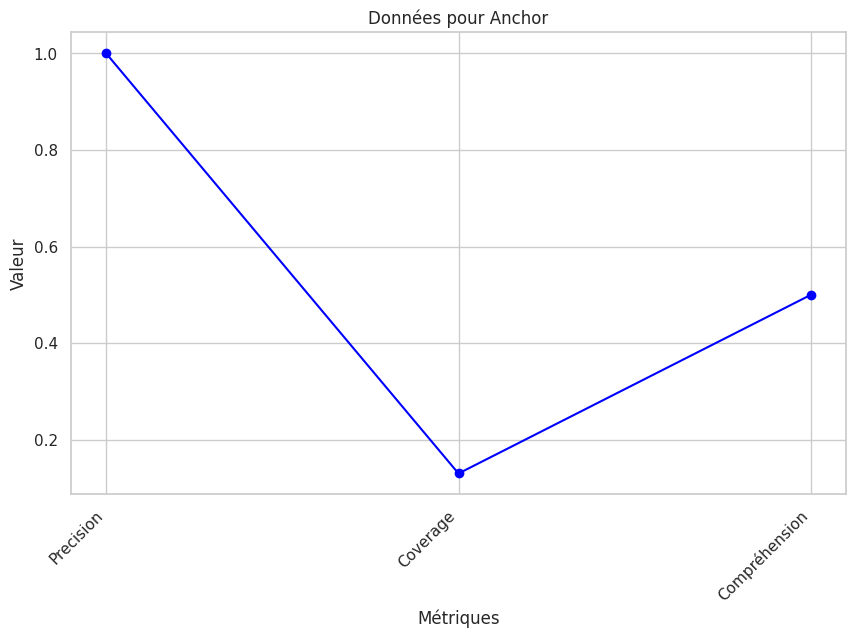

In [37]:
explanation = 'Anchor'
precision1 = 1.00
coverage1 = 0.13
precision2 = 1.00
coverage2 = 0.15

precision = (precision1 + precision2) / 2

anchor_data = pd.DataFrame({
    'Explication': [explanation],
    'Precision': [precision],
    'Coverage': [coverage1]
})

merged_df = pd.merge(anchor_data, mean_df.reset_index(), left_on='Explication', right_on='Explication', how='left')

print(merged_df)

anchor_values = merged_df.iloc[0, 1:4].values

fig, ax = plt.subplots(figsize=(10, 6))
labels = ['Precision', 'Coverage', 'Compréhension']
ax.bar(labels, anchor_values, color=['skyblue', 'lightcoral', 'tab:red'])
ax.set_ylabel('Valeur')
ax.set_title(f'Données pour {explanation}')
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
x = labels
y = anchor_values
ax.plot(x, y, marker='o', linestyle='-', color='blue')
ax.set_xlabel('Métriques')
ax.set_ylabel('Valeur')
ax.set_title(f'Données pour {explanation}')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


  Explication  Precision  Coverage  Compréhension  Confiance    Accord
0      Anchor        1.0      0.13            0.5   0.222222  0.222222


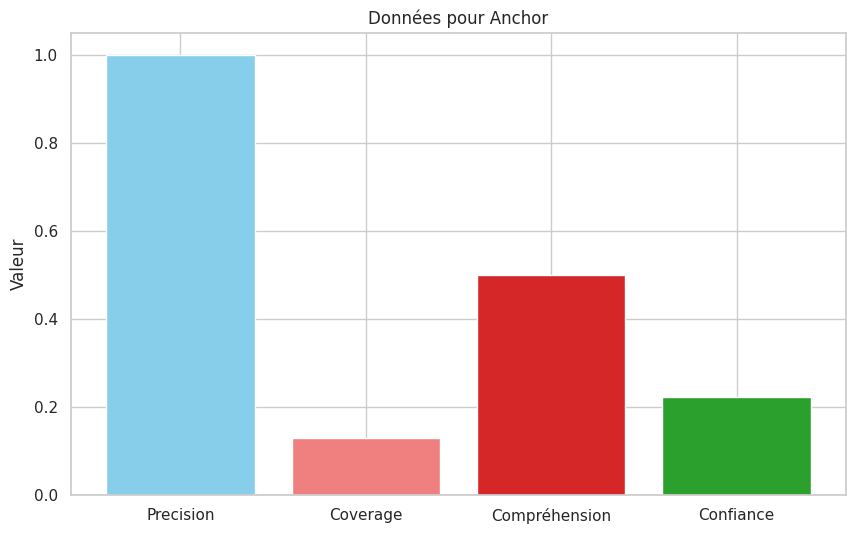

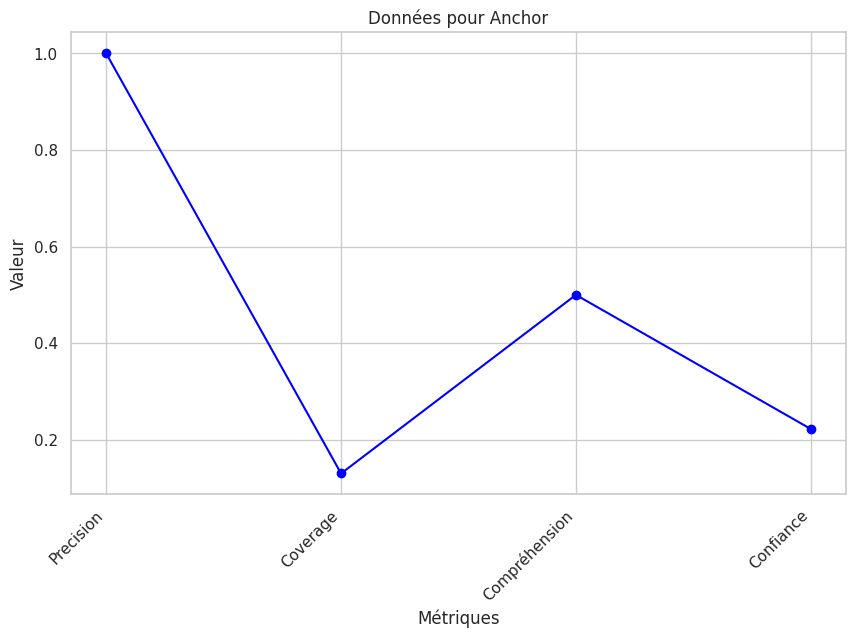

In [38]:
explanation = 'Anchor'
precision1 = 1.00
coverage1 = 0.13
precision2 = 1.00
coverage2 = 0.15

precision = (precision1 + precision2) / 2

anchor_data = pd.DataFrame({
    'Explication': [explanation],
    'Precision': [precision],
    'Coverage': [coverage1]
})

merged_df = pd.merge(anchor_data, mean_df.reset_index(), left_on='Explication', right_on='Explication', how='left')

print(merged_df)

anchor_values = merged_df.iloc[0, 1:5].values
fig, ax = plt.subplots(figsize=(10, 6))
labels = ['Precision', 'Coverage', 'Compréhension', 'Confiance']
ax.bar(labels, anchor_values, color=['skyblue', 'lightcoral', 'tab:red', 'tab:green'])
ax.set_ylabel('Valeur')
ax.set_title(f'Données pour {explanation}')
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
x = labels
y = anchor_values
ax.plot(x, y, marker='o', linestyle='-', color='blue')
ax.set_xlabel('Métriques')
ax.set_ylabel('Valeur')
ax.set_title(f'Données pour {explanation}')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


  Explication  Precision  Coverage  Compréhension  Confiance    Accord
0      Anchor        1.0      0.13            0.5   0.222222  0.222222


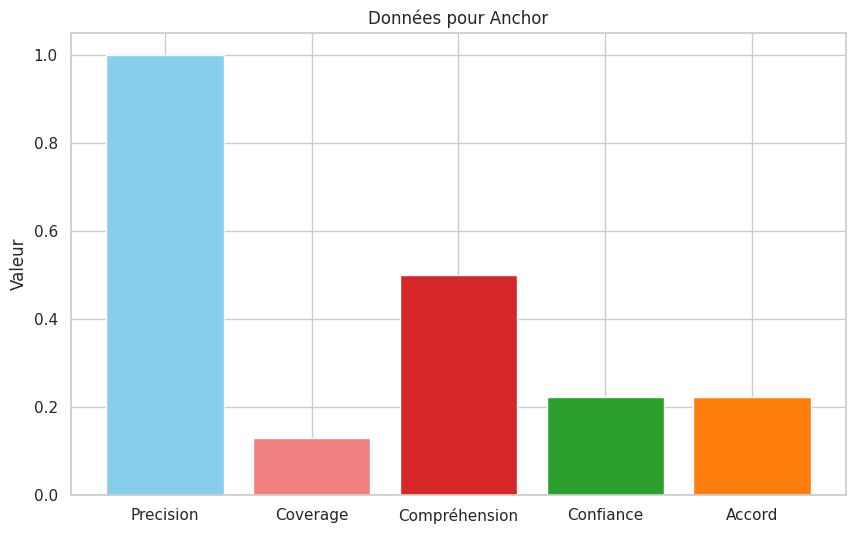

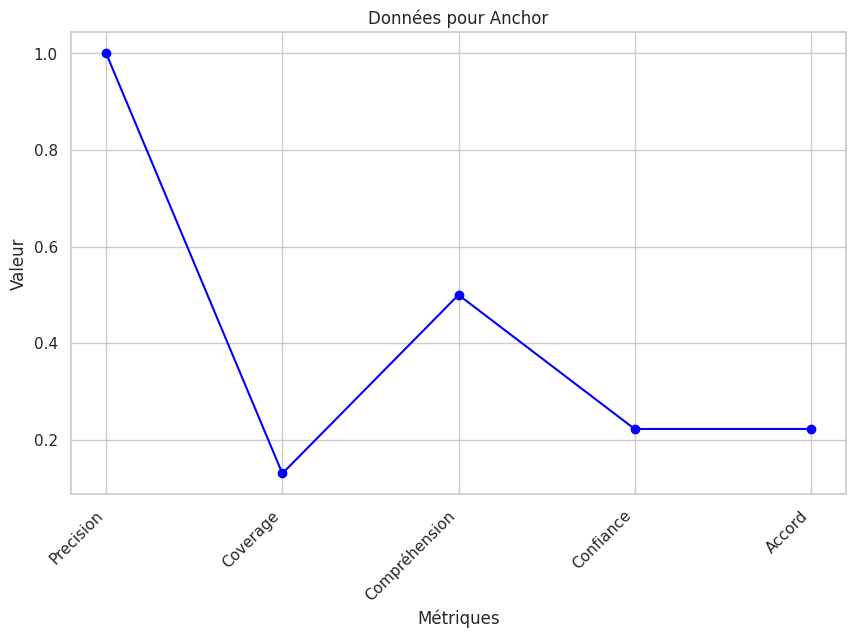

In [39]:
explanation = 'Anchor'
precision1 = 1.00
coverage1 = 0.13
precision2 = 1.00
coverage2 = 0.15

precision = (precision1 + precision2) / 2

anchor_data = pd.DataFrame({
    'Explication': [explanation],
    'Precision': [precision],
    'Coverage': [coverage1]
})

merged_df = pd.merge(anchor_data, mean_df.reset_index(), left_on='Explication', right_on='Explication', how='left')

print(merged_df)

anchor_values = merged_df.iloc[0, 1:6].values

fig, ax = plt.subplots(figsize=(10, 6))
labels = ['Precision', 'Coverage', 'Compréhension', 'Confiance', 'Accord']
ax.bar(labels, anchor_values, color=['skyblue', 'lightcoral', 'tab:red', 'tab:green', 'tab:orange'])
ax.set_ylabel('Valeur')
ax.set_title(f'Données pour {explanation}')
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
x = labels
y = anchor_values
ax.plot(x, y, marker='o', linestyle='-', color='blue')
ax.set_xlabel('Métriques')
ax.set_ylabel('Valeur')
ax.set_title(f'Données pour {explanation}')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


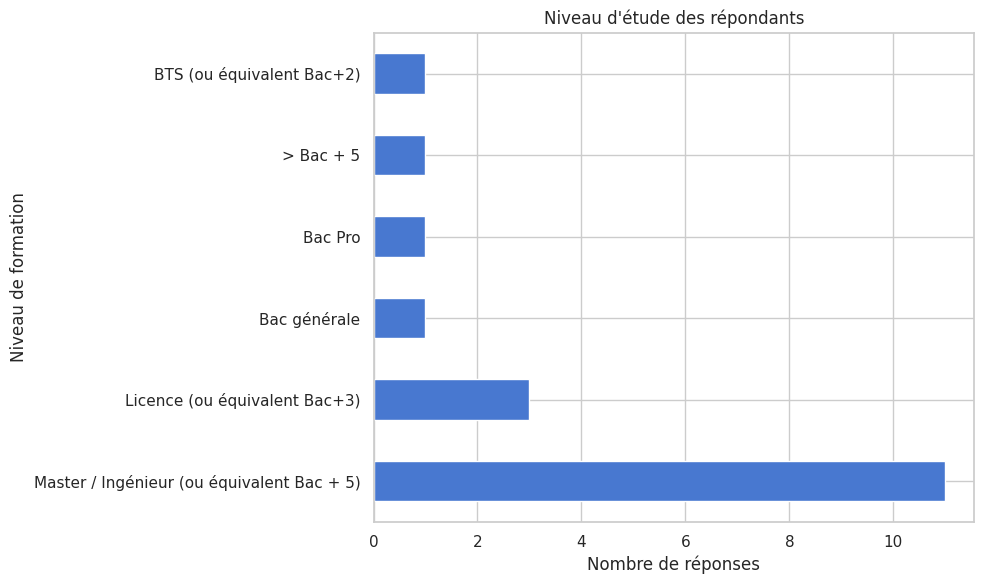

In [40]:
import matplotlib.pyplot as plt

formation_counts = df['Quel est votre dernier niveau de formation ou actuel ?   '].value_counts()

plt.figure(figsize=(10, 6))
formation_counts.plot(kind='barh', color=colors_palette[0])
plt.title('Niveau d\'étude des répondants')
plt.xlabel('Nombre de réponses')
plt.ylabel('Niveau de formation')
plt.tight_layout()
plt.show()


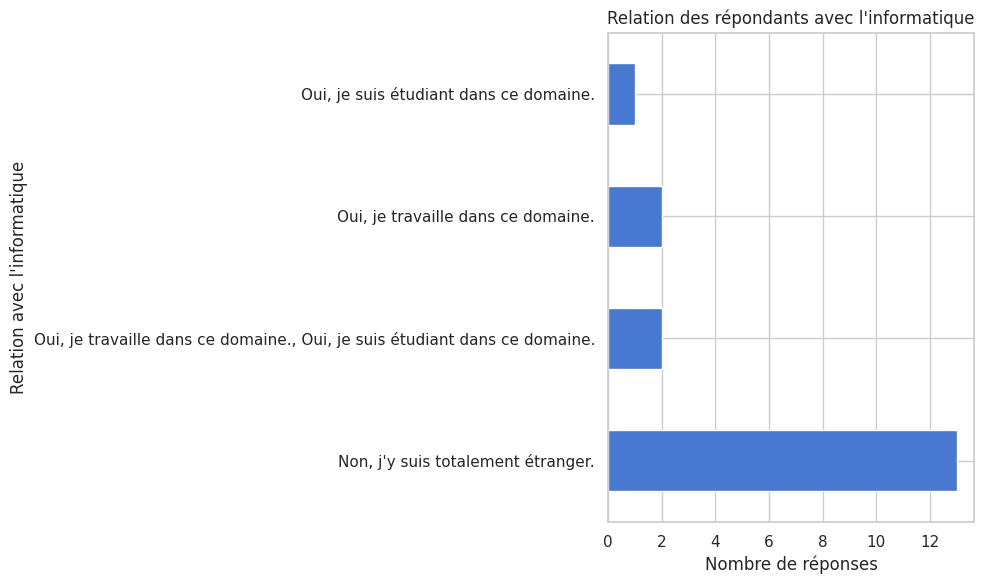

In [41]:
import matplotlib.pyplot as plt

formation_counts = df['Travaillez vous, effectuez vous ou Avez-vous effectué des études dans le domaine informatique ?'].value_counts()

plt.figure(figsize=(10, 6))
formation_counts.plot(kind='barh', color=colors_palette[0])
plt.title('Relation des répondants avec l\'informatique')
plt.xlabel('Nombre de réponses')
plt.ylabel('Relation avec l\'informatique')
plt.tight_layout()
plt.show()


<ipython-input-42-abb19ec34778>:10: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.



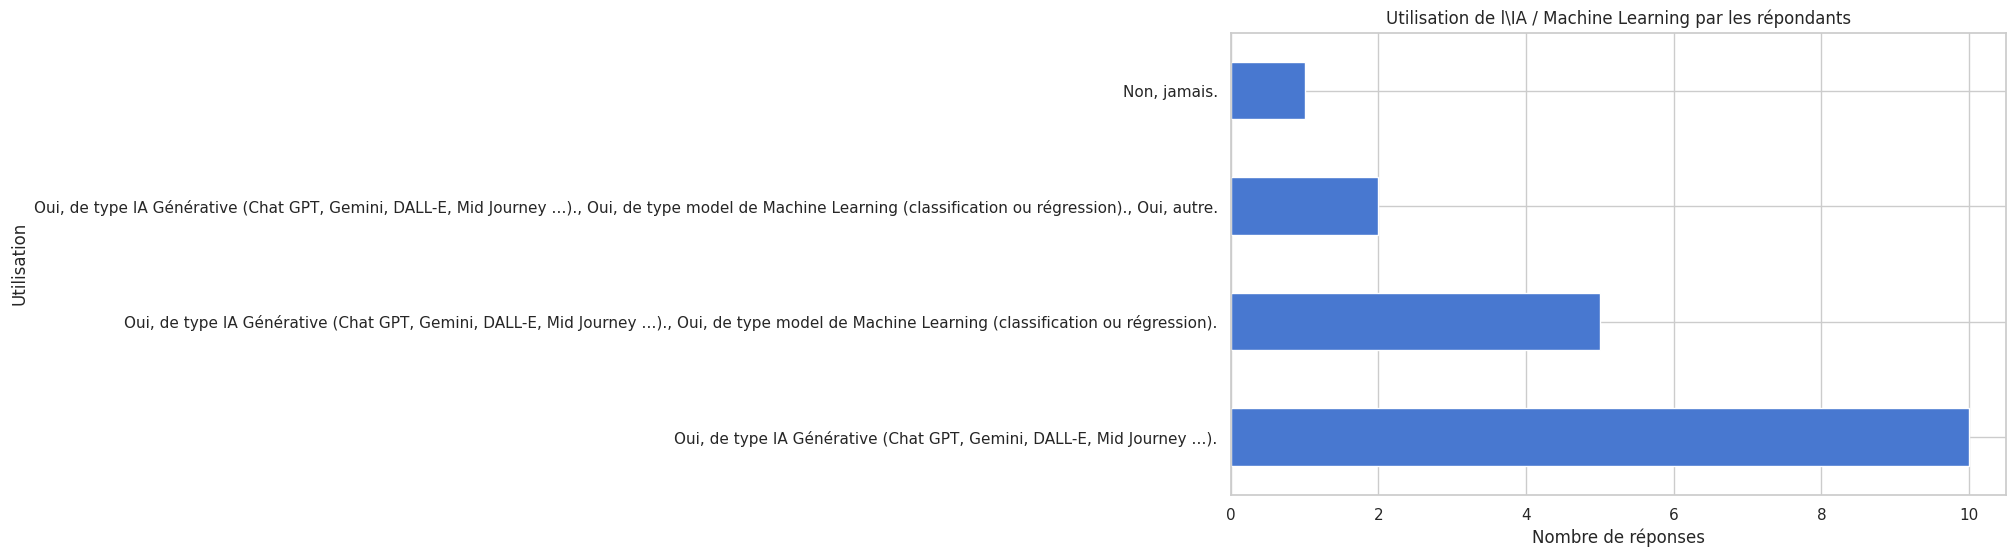

In [42]:
import matplotlib.pyplot as plt

formation_counts = df['Avez-vous déjà utilisé des outils d’IA ou de machine Learning ?'].value_counts()

plt.figure(figsize=(10, 6))
formation_counts.plot(kind='barh', color=colors_palette[0])
plt.title('Utilisation de l\IA / Machine Learning par les répondants')
plt.xlabel('Nombre de réponses')
plt.ylabel('Utilisation')
plt.tight_layout()
plt.show()


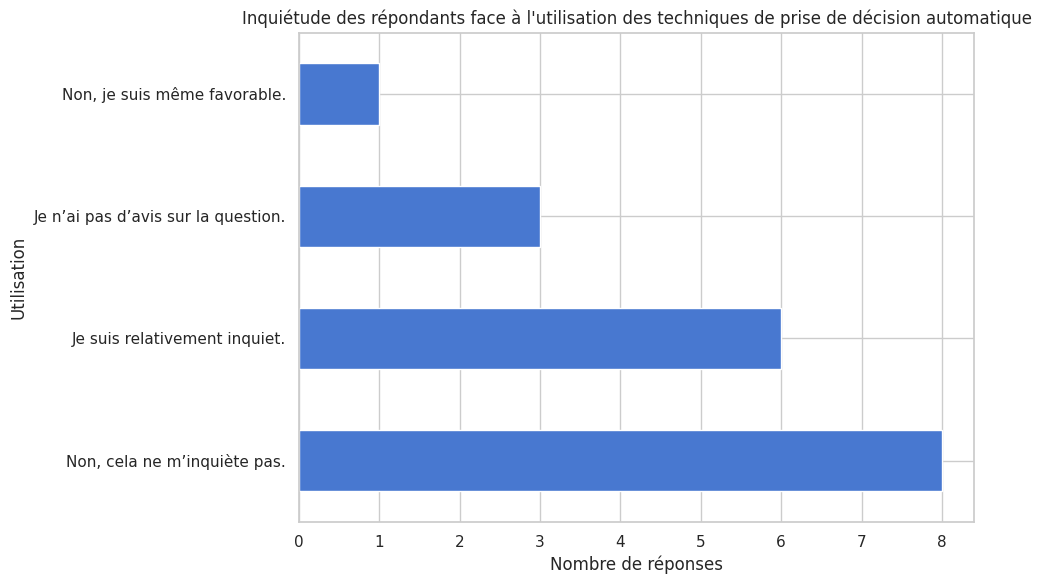

In [44]:
import matplotlib.pyplot as plt

formation_counts = df['Êtes-vous inquiet que de telle technique puisse être employées dans différents domaines (éducation, juridique, médical …) ?'].value_counts()

plt.figure(figsize=(10, 6))
formation_counts.plot(kind='barh', color=colors_palette[0])
plt.title('Inquiétude des répondants face à l\'utilisation des techniques de prise de décision automatique')
plt.xlabel('Nombre de réponses')
plt.ylabel('Utilisation')
plt.tight_layout()
plt.show()


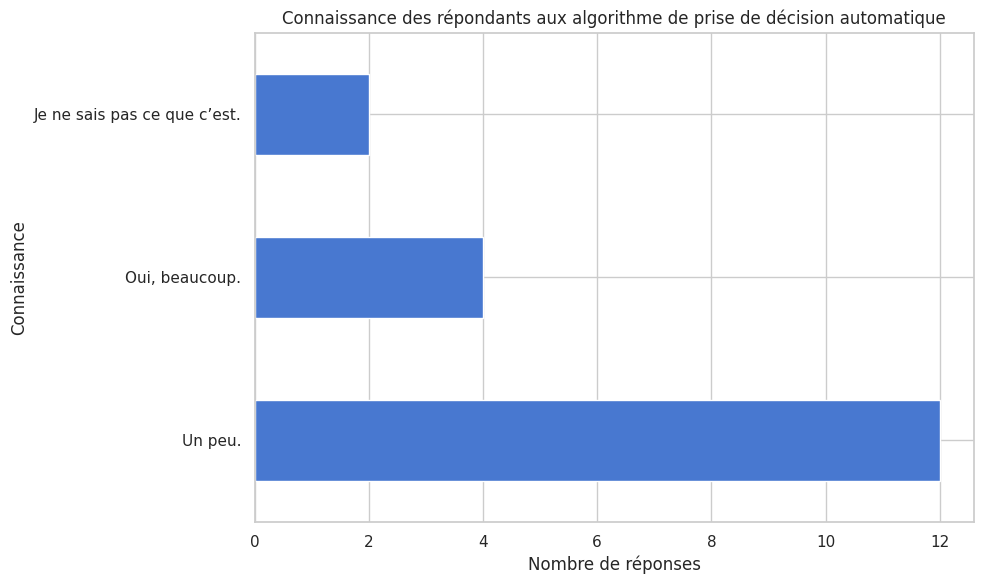

In [45]:

import matplotlib.pyplot as plt

formation_counts = df['Vous sentez vous concerné par les algorithmes de prise de décision automatique ?'].value_counts()

plt.figure(figsize=(10, 6))
formation_counts.plot(kind='barh', color=colors_palette[0])
plt.title('Connaissance des répondants aux algorithme de prise de décision automatique')
plt.xlabel('Nombre de réponses')
plt.ylabel('Connaissance')
plt.tight_layout()
plt.show()
